In [ ]:
# reload external modules automatically if they are changed
%load_ext autoreload
%autoreload 2

In [1]:
# functions to create the boards and dataset
import random
import json
import numpy as np
import matplotlib.pyplot as plt
# import libraries for plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.colors import ListedColormap, Normalize
from genDSL_helpers import *
from board_modifications_and_shapes import *

################# PARAMETERS TO CHANGE ####################
debug_mode = False
dataset_folder = './2_shape_color_scaling_objects_18_variations' # will make 3 subfolders in this folder: pixel_removal, color_change, combined
subdirs_for_each_type = False # create a new subfolder for each type of riddle

#total number of puzzles (meta samples)
dataset_size = 2 # per dataset
plot_items = 3 # number of puzzles to plot

#number of training boards and testing boards 0 for random
meta_trn_size = 0
meta_tst_size = 1 # always 1


# Riddle Description

**color_scale_rotate_remove_padding** - The shape in the center of the output board should be changed in scale to the length of a line that is in one of the 4 corners.  The padding should be removed from around the shape.  The shape should be rotated to the cardinality indicated by the corner that the line is in.  The direction of the line does not matter (whether up, down, or diagonal)--it has the same meaning.  The input boards will have 3 out of 4 cardinalities represented by the presence of the line in each of the 3 corners.  Deduction is required to determine the left out cardinality for rotating the test item.  The shape/object should be changed in color to the color of the line. The grid size is part of the puzzle.

**color_scale_rotate** - The shape in the center of the output board should be changed in scale to the length of a line that is in one of the 4 corners.  The padding should be the same size as the line length (e.g., 4 squares if the line is 4 squares long)  The shape should be rotated to the cardinality indicated by the corner that the line is in.  The direction of the line does not matter (whether up, down, or diagonal)--it has the same meaning.  The input boards will have the other 3 cardinalities represented by the presence of the line in each of the 3 corners.  It requires the model to generalize to the left out cardinality for rotating the item.  The shape/object should be changed in color to the color of the line. The grid size is part of the puzzle.

**color_scale** - The shape in the center of the output board should be changed in scale to the length of a line that is in one of the 4 corners.  The padding should be the same size as the line length (e.g., 4 squares if the line is 4 squares long).  The shape/object should be changed in color to the color of the line. The grid size changes based on the scale of the puzzle (the object size plus padding).

**color_rotate** - The shape in the center is changed to the color of the indicator line.  It is rotated by a cardinality represented by the length of an indicator line contained in one of the corners. The cardinality must be deduced from the rest of the input/output pairs where 3 of 4 cardinalities are represented.  The test pair uses the left-out cardinality. The output grid size may change if the object has a different length or width.

**color_scale_remove_padding** - The shape in the center of the output board should be changed in scale to the length of a line that is in one of the 4 corners.  The padding should be removed.  The shape/object should be changed in color to the color of the line. The grid size changes based on the scale of the puzzle (the object size plus padding).

**padding_f_shape_scale_shape_scale_f_indicator_rotate** - The shape in the center of the output board should be changed in scale to the length of a line that is in one of the 4 corners.  The padding should be the same size as the scale of the object in the input grid.  The padding should also be of the color of the input grid object.  The shape should be rotated to the cardinality indicated by the corner that the line is in.  The direction of the line does not matter (whether up, down, or diagonal)--it has the same meaning.  The input boards will have 3 out of 4 cardinalities represented by the presence of the line in each of the 3 corners.  Deduction is required to determine the left out cardinality for rotating the test item.  The shape/object should be changed in color to the color of the line. The grid size is part of the puzzle (shape scale plus padding).

"padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_shape_scale_1_shape_color_f_line", "padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_and_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_shape_scale_1_shape_color_f_line", "padding_f_scale_shape_repeat_f_line_length_direction_f_line_direction_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repeat_shape_color_f_line_shape_scale_1_inter_shape_distance_f_scale_random_line_colors", "no_padding_scale_f_line_length_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_color_f_last_color_in_line_direction_f_line_direction_inter_item_distance_of_0"

Creating shape_color_scaling riddles with riddle_type=color_scale_rotate_remove_padding...


  0%|          | 0/2 [00:00<?, ?it/s]

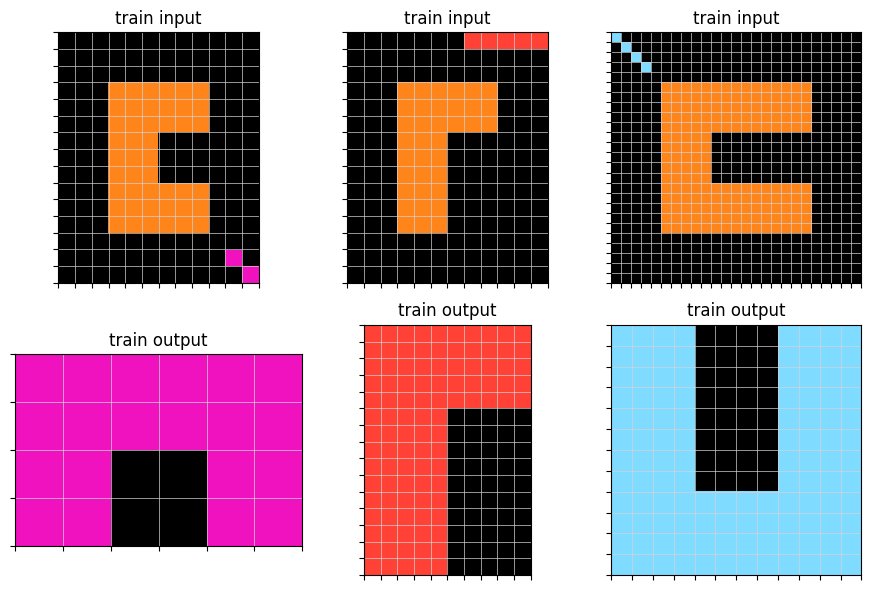

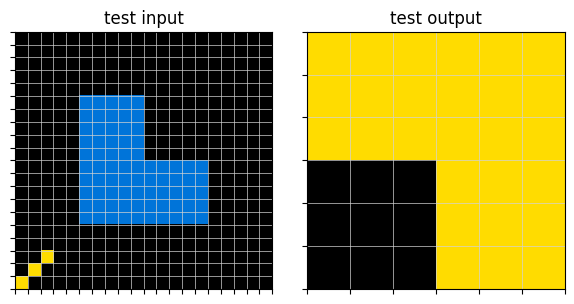

100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

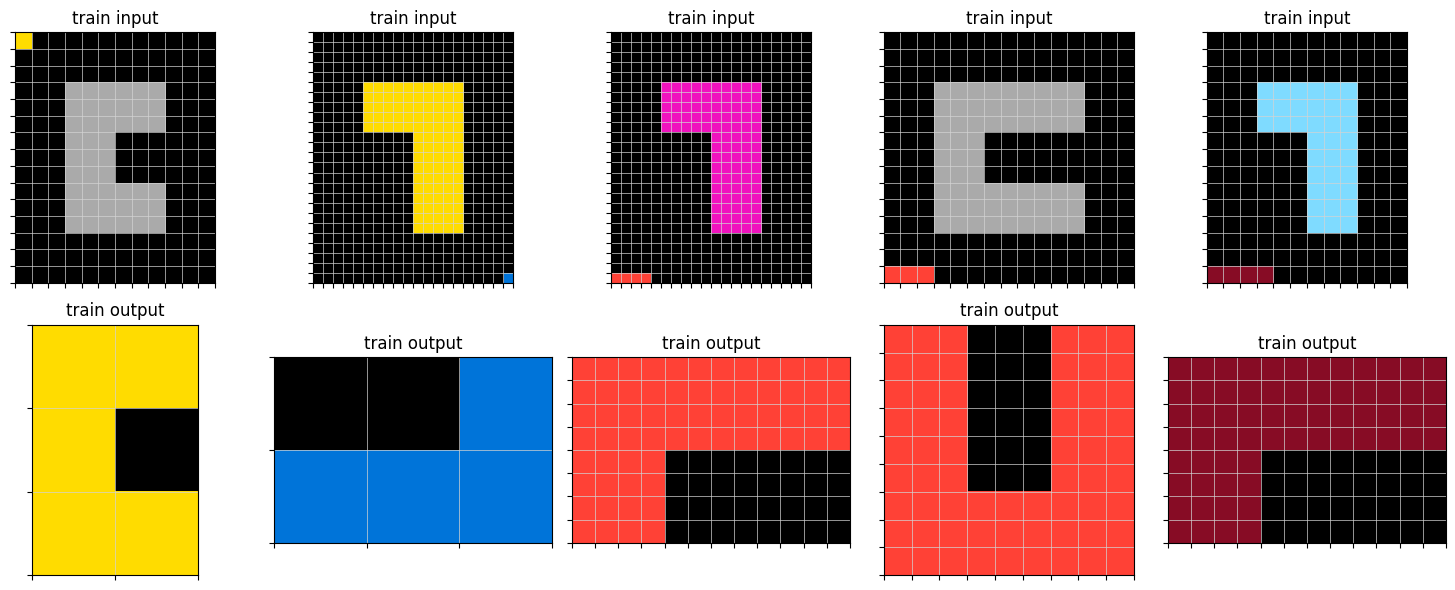

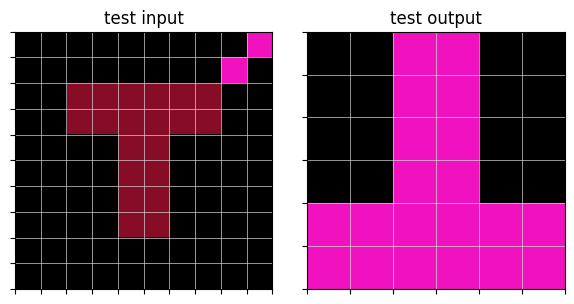

Creating shape_color_scaling riddles with riddle_type=count_color_and_repeat_shape_bg_input_shape_color...


100%|██████████| 2/2 [00:03<00:00,  1.50s/it]


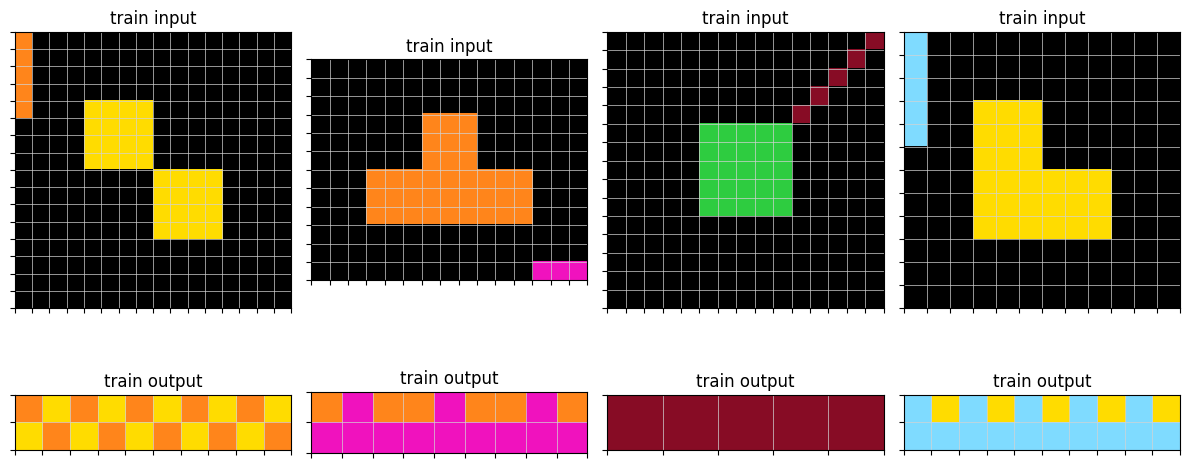

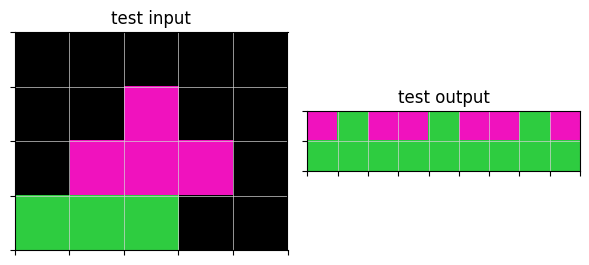

100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

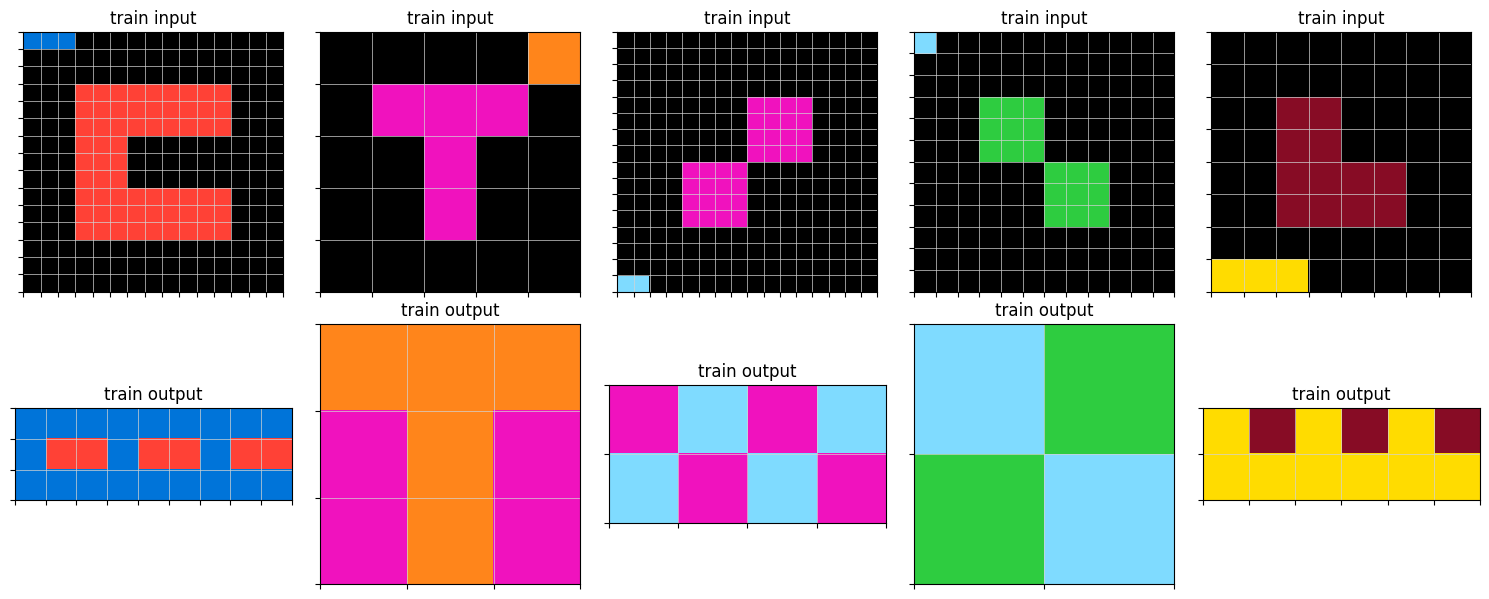

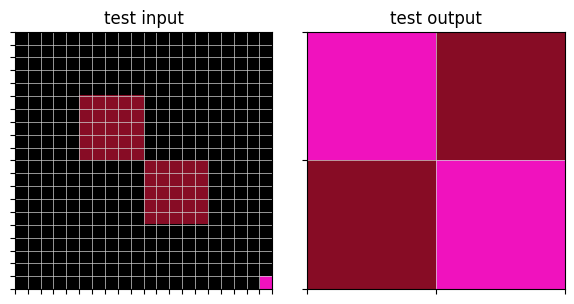

Creating shape_color_scaling riddles with riddle_type=scale_to_padding_line_length_to_scale_random_indicator_color_corner_to_rotate...


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


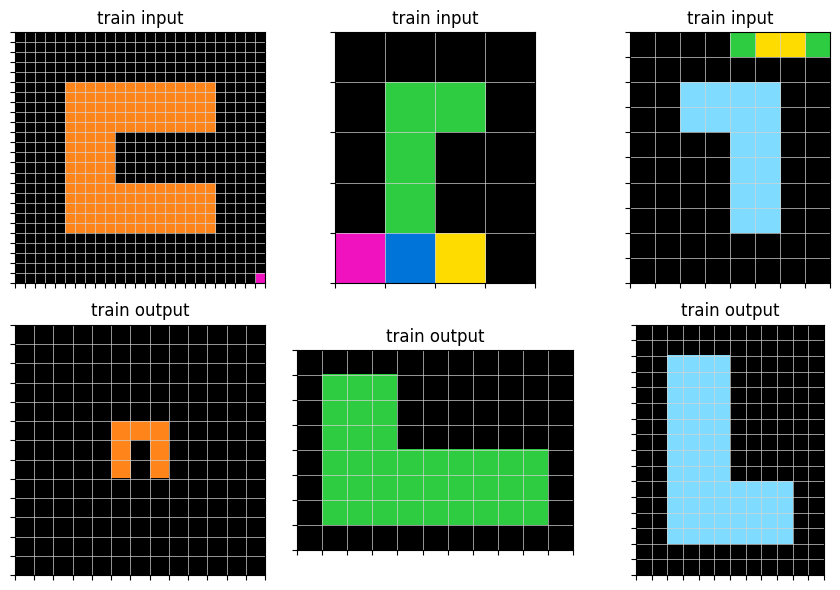

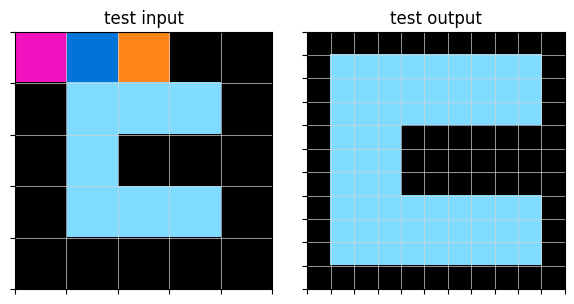

100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

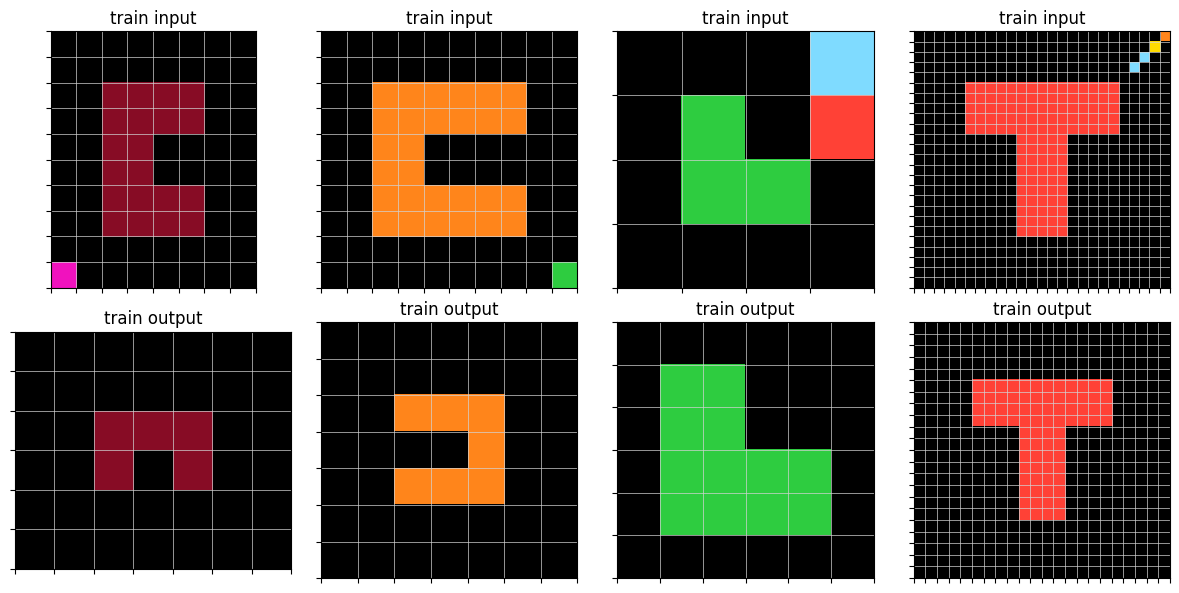

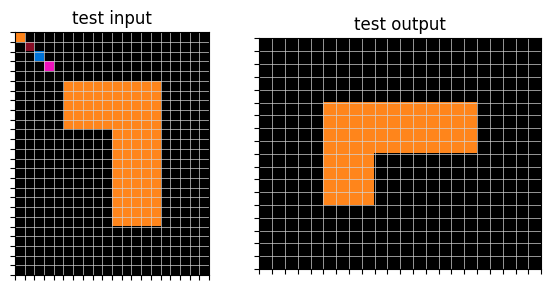

Creating shape_color_scaling riddles with riddle_type=padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_shape_scale_1_shape_color_f_line...


100%|██████████| 2/2 [00:03<00:00,  1.77s/it]


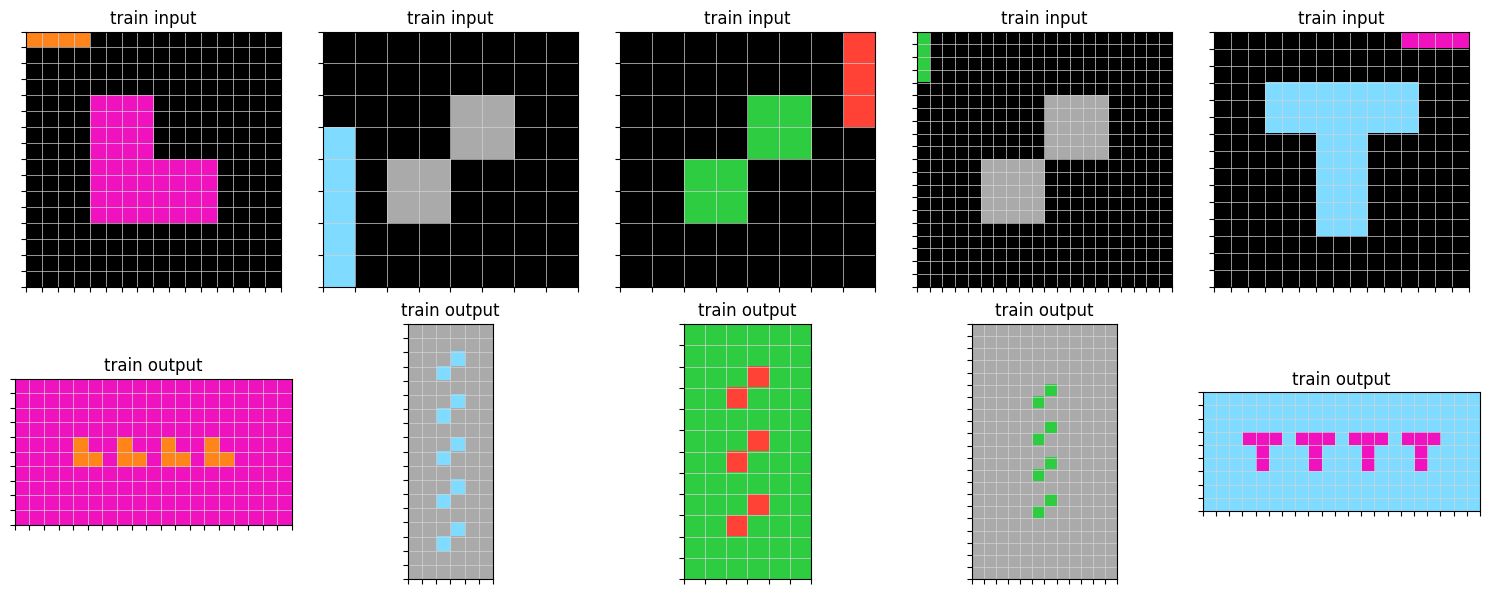

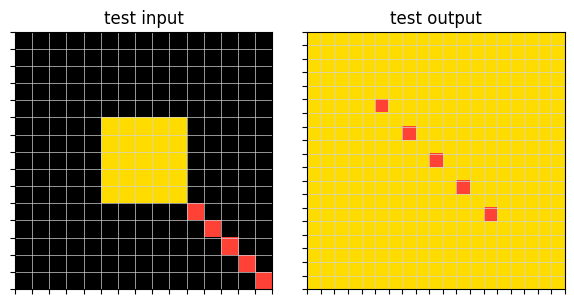

100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

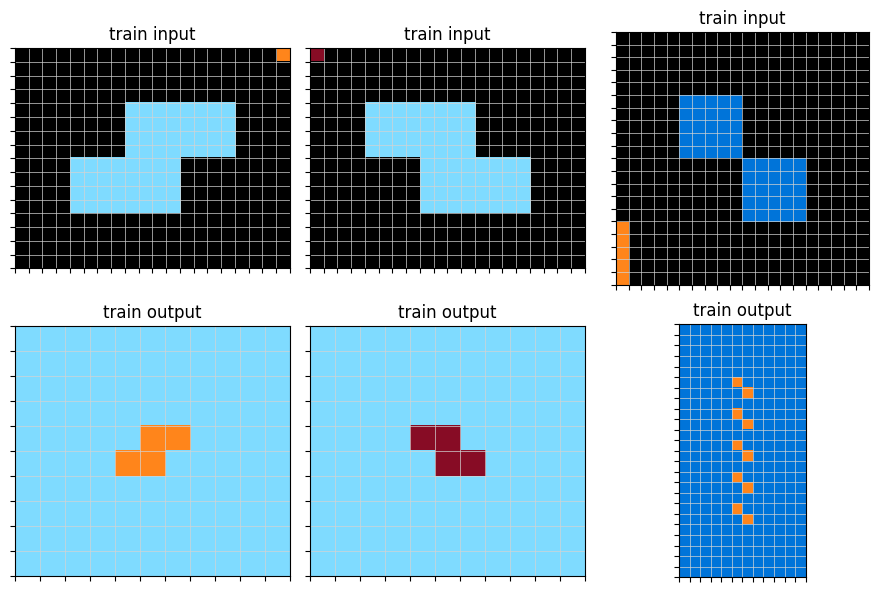

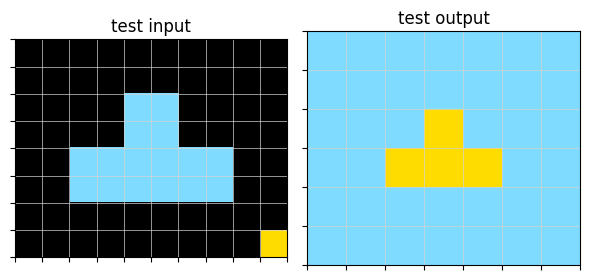

Creating shape_color_scaling riddles with riddle_type=padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_and_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_shape_scale_1_shape_color_f_line...


100%|██████████| 2/2 [00:03<00:00,  1.64s/it]


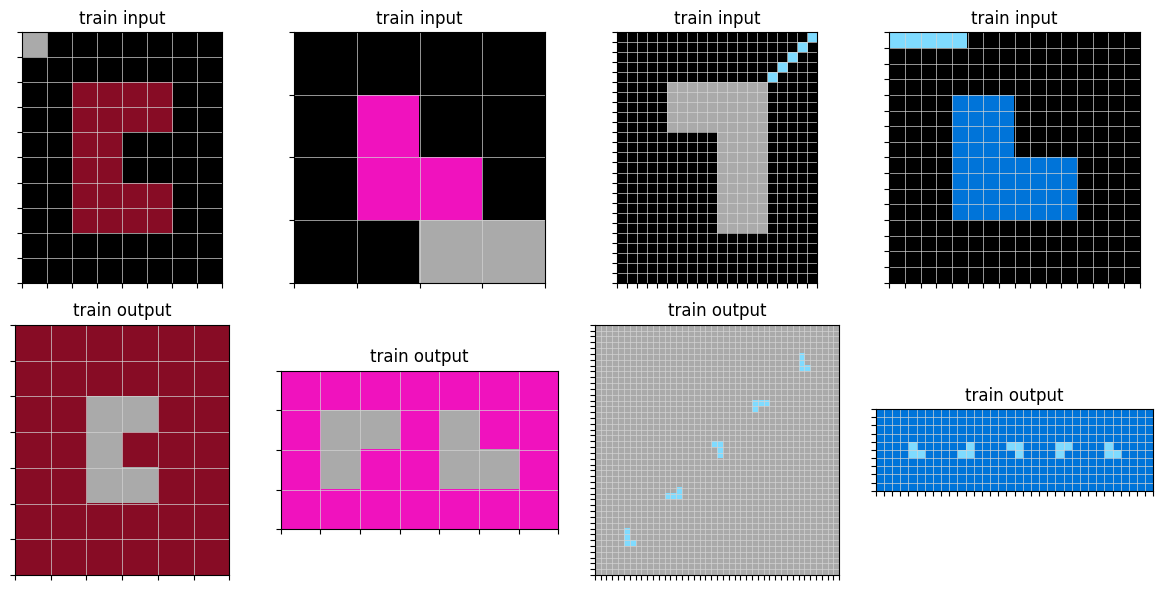

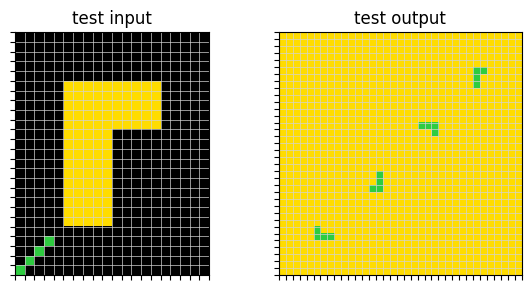

100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

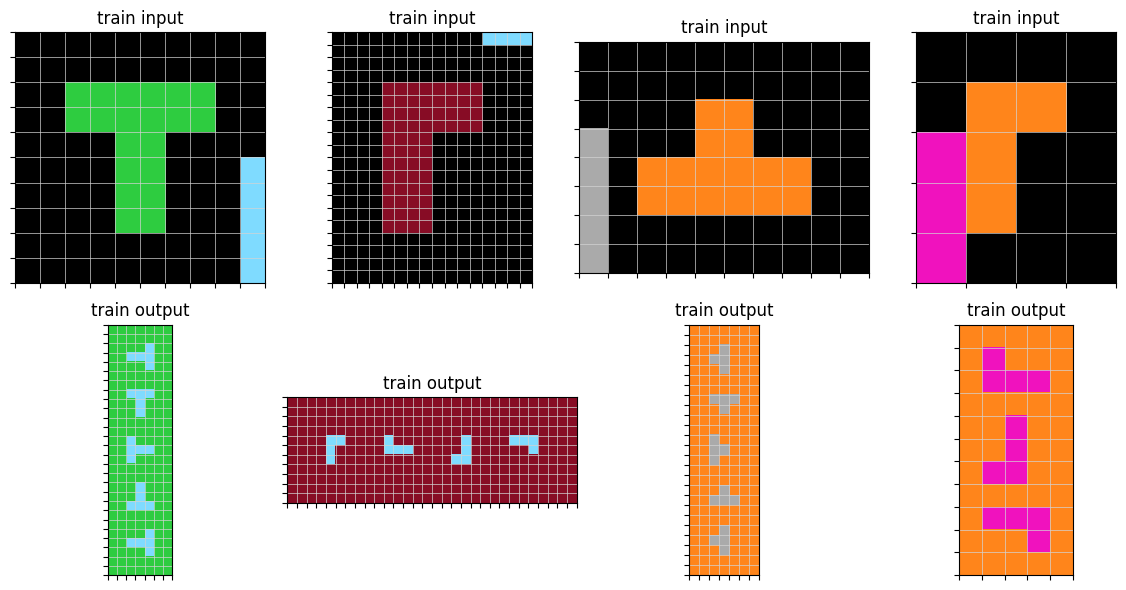

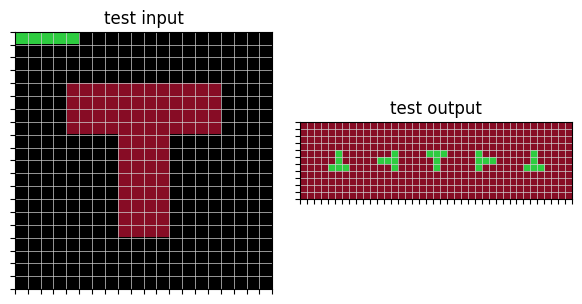

Creating shape_color_scaling riddles with riddle_type=padding_f_scale_shape_repeat_f_line_length_direction_f_line_direction_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repeat_shape_color_f_line_shape_scale_1_inter_shape_distance_f_scale_random_line_colors...


100%|██████████| 2/2 [00:04<00:00,  2.35s/it]


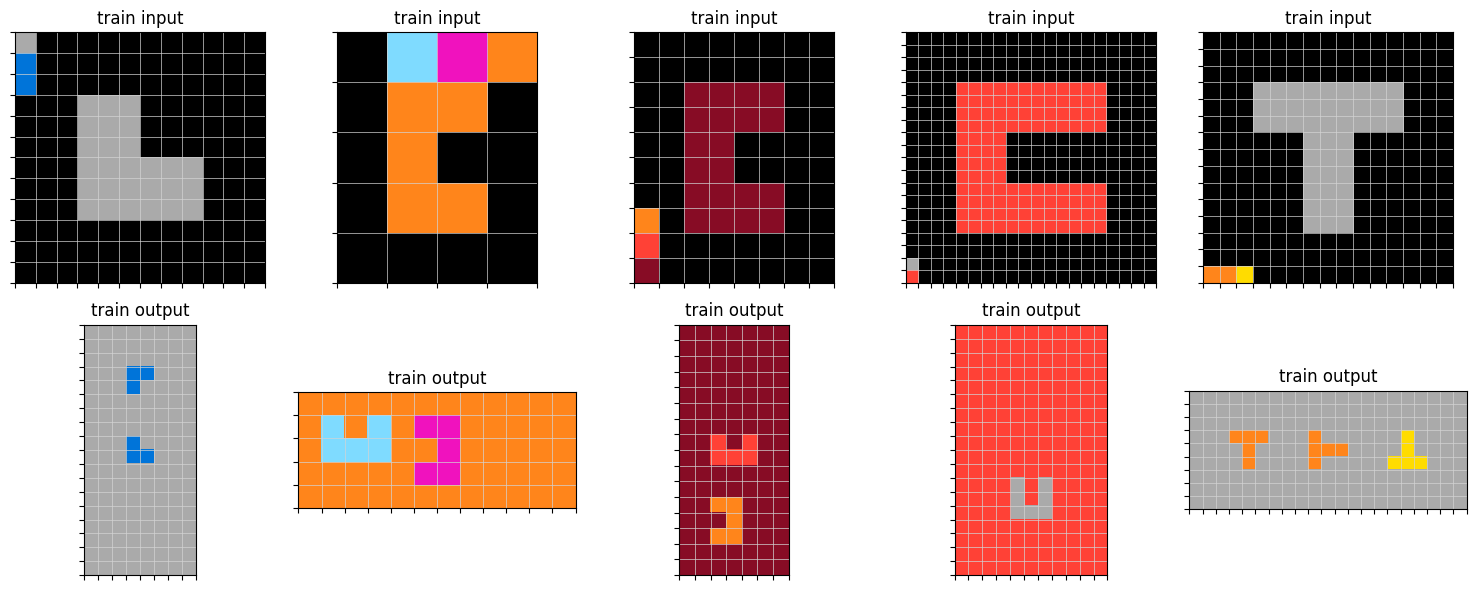

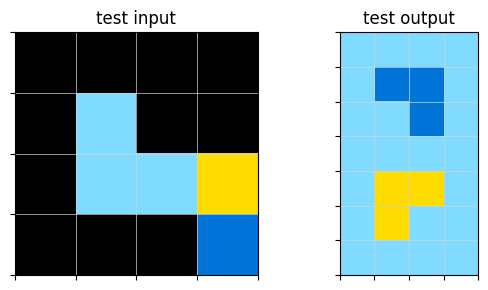

100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

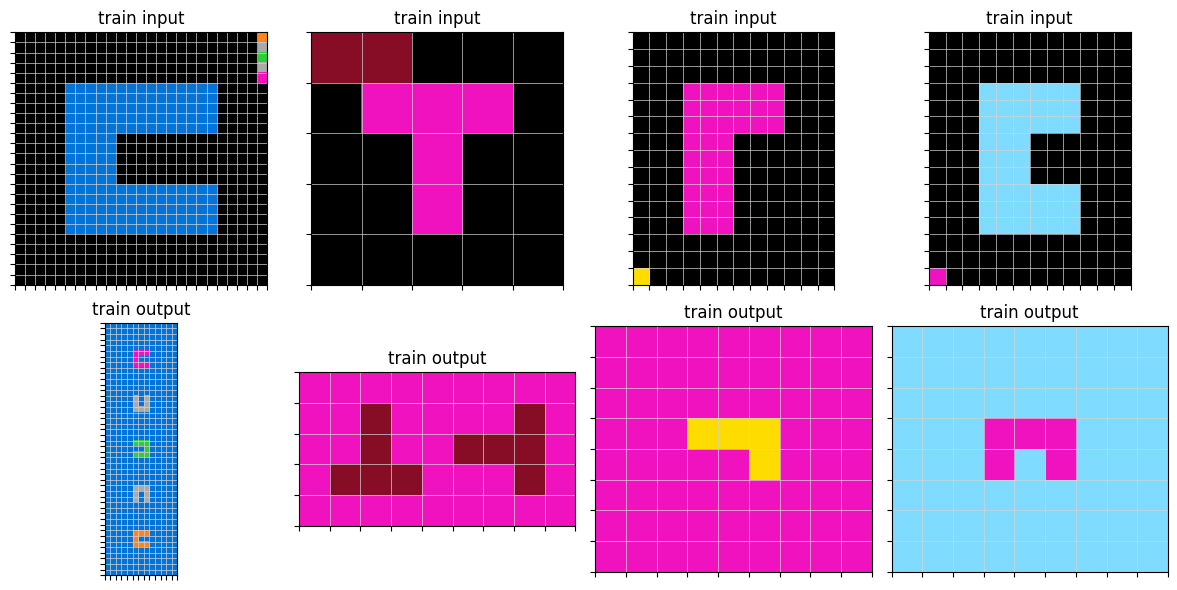

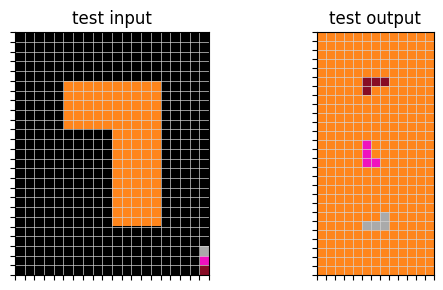

Creating shape_color_scaling riddles with riddle_type=no_padding_scale_f_line_length_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_color_f_last_color_in_line_direction_f_line_direction_inter_item_distance_of_0...


100%|██████████| 2/2 [00:03<00:00,  1.68s/it]


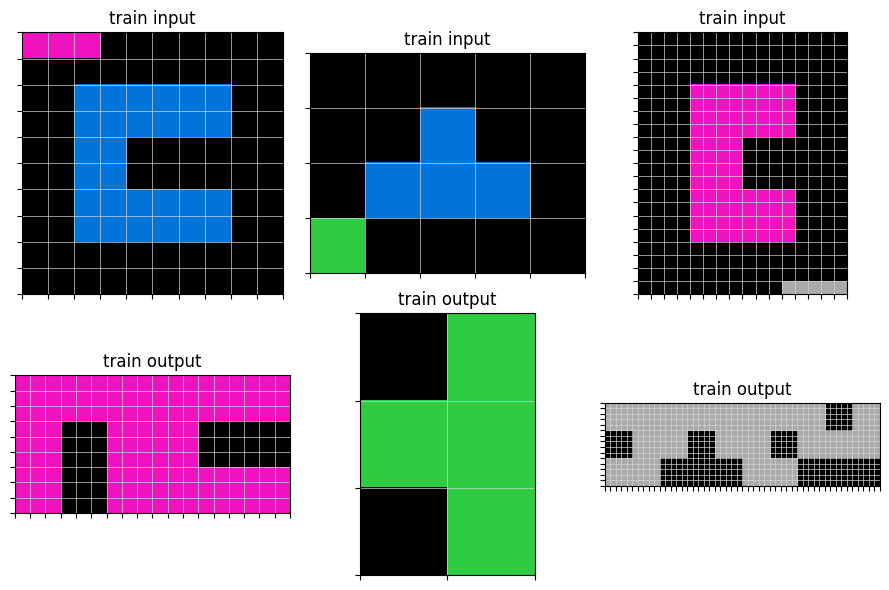

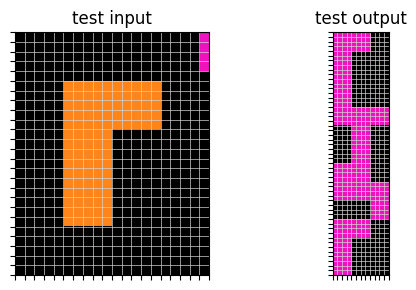

100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

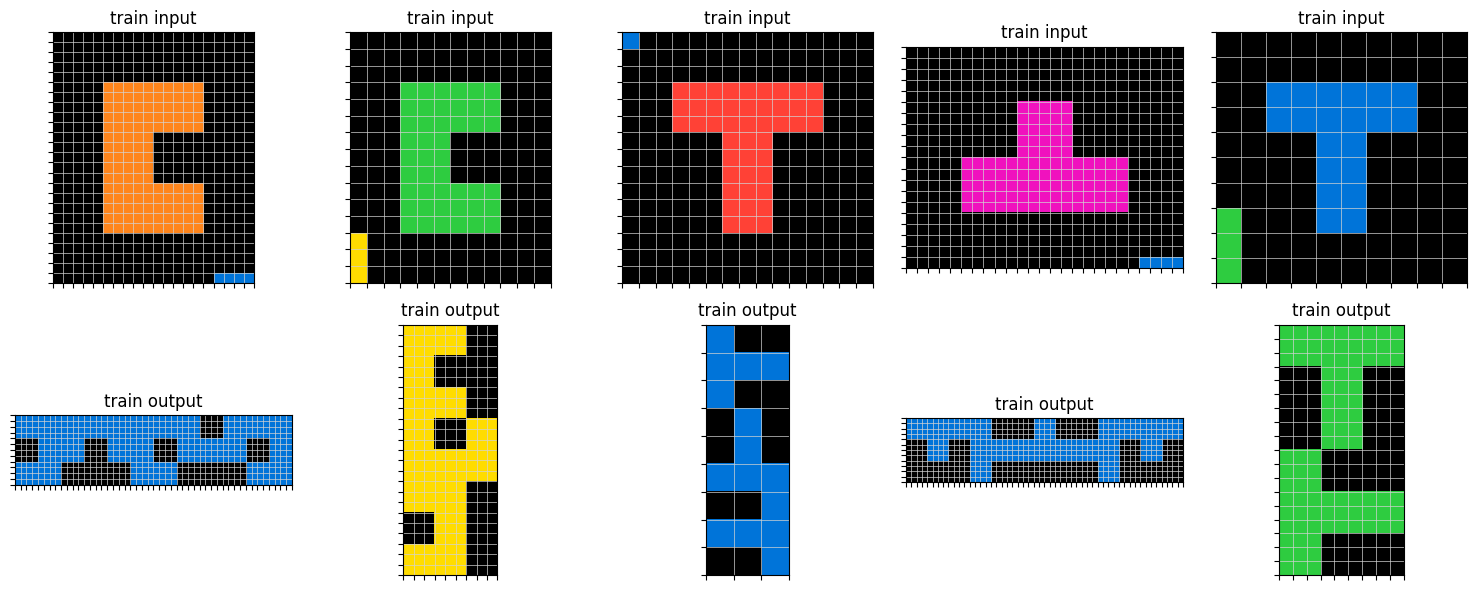

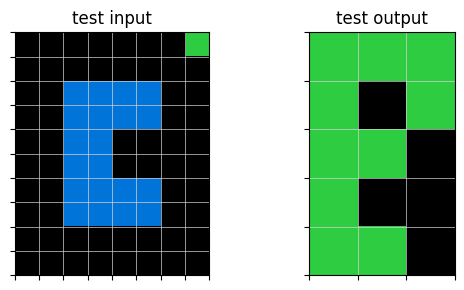

Creating shape_color_scaling riddles with riddle_type=scale_rotate...


100%|██████████| 2/2 [00:04<00:00,  2.18s/it]


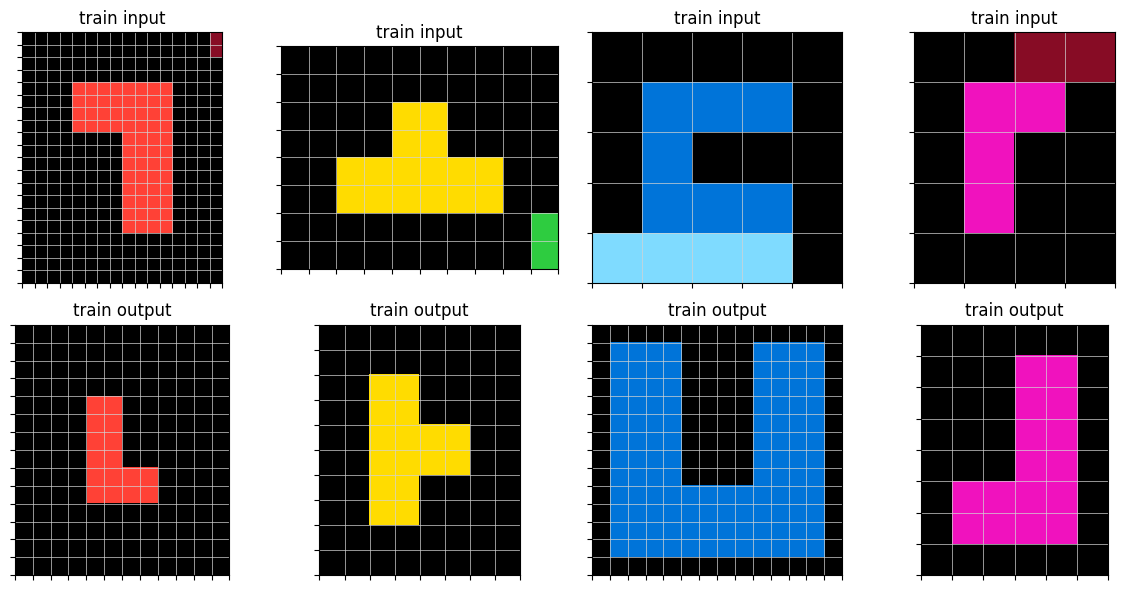

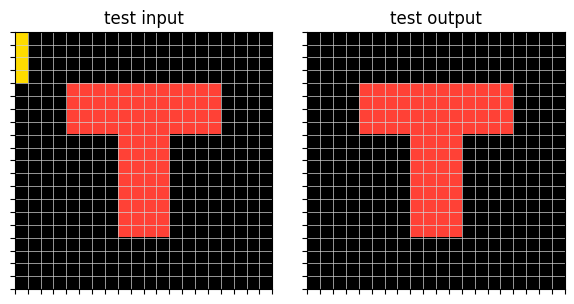

100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

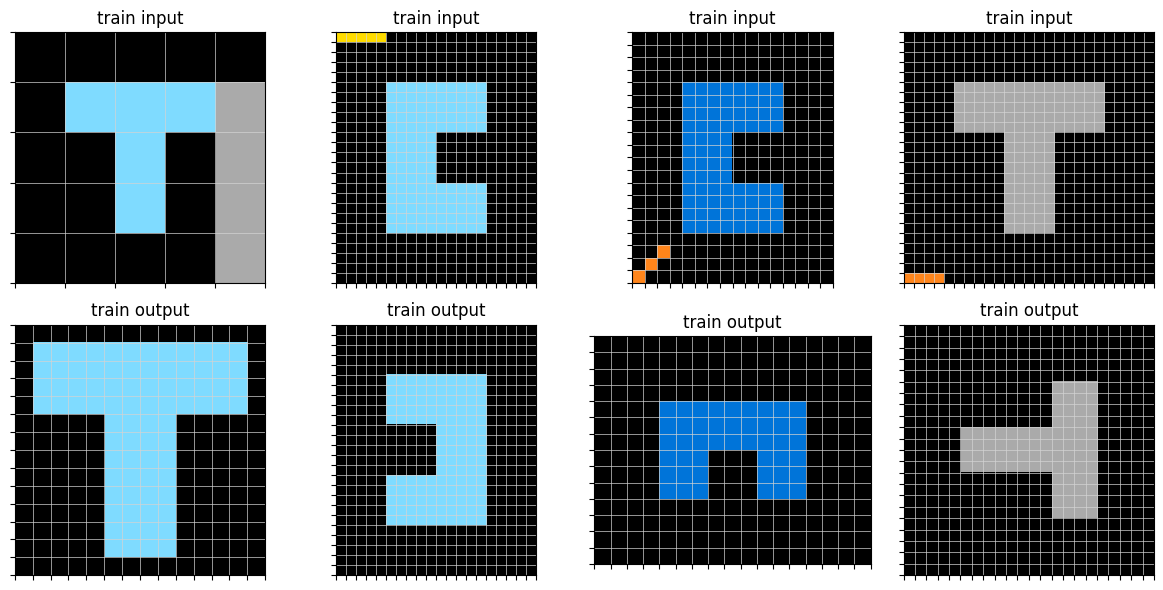

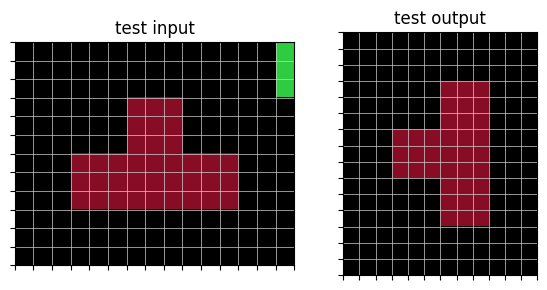

Creating shape_color_scaling riddles with riddle_type=color...


100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


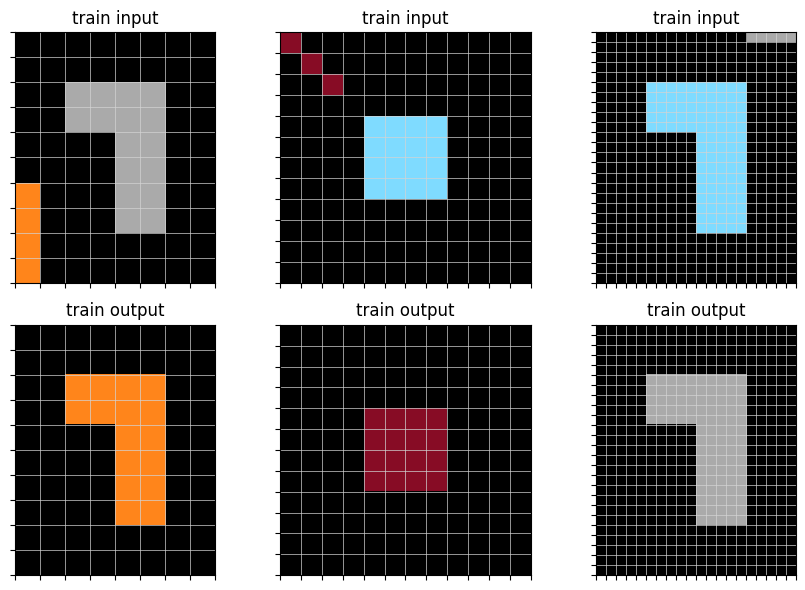

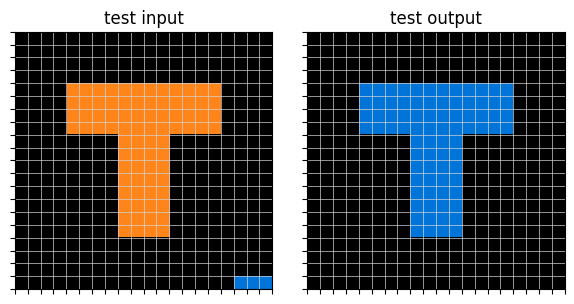

100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

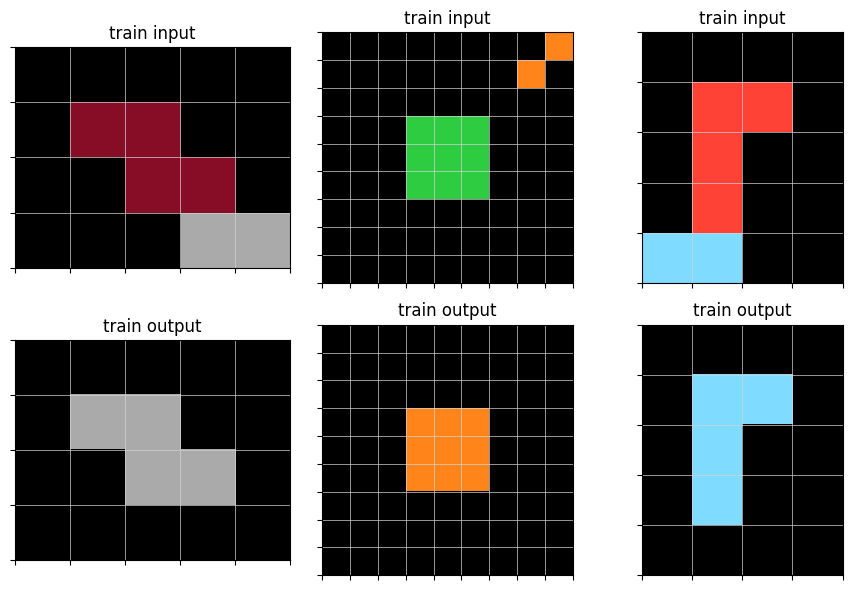

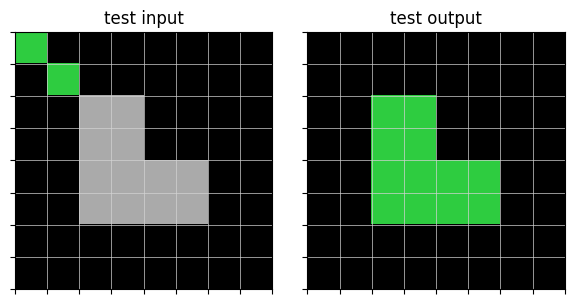

Creating shape_color_scaling riddles with riddle_type=rotate...


100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


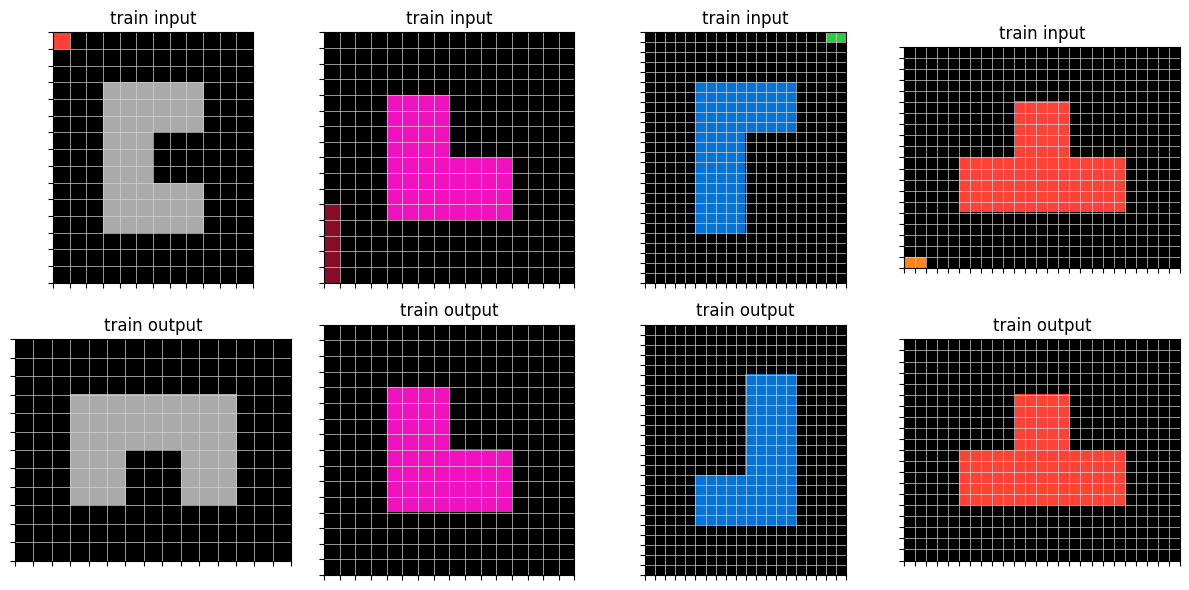

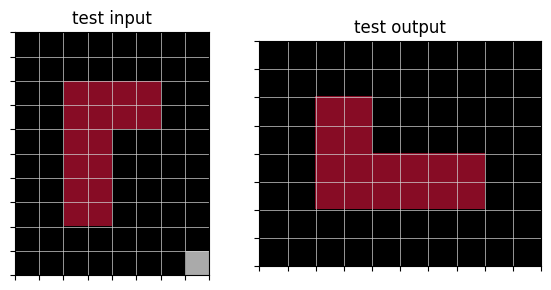

100%|██████████| 2/2 [00:03<00:00,  1.58s/it]

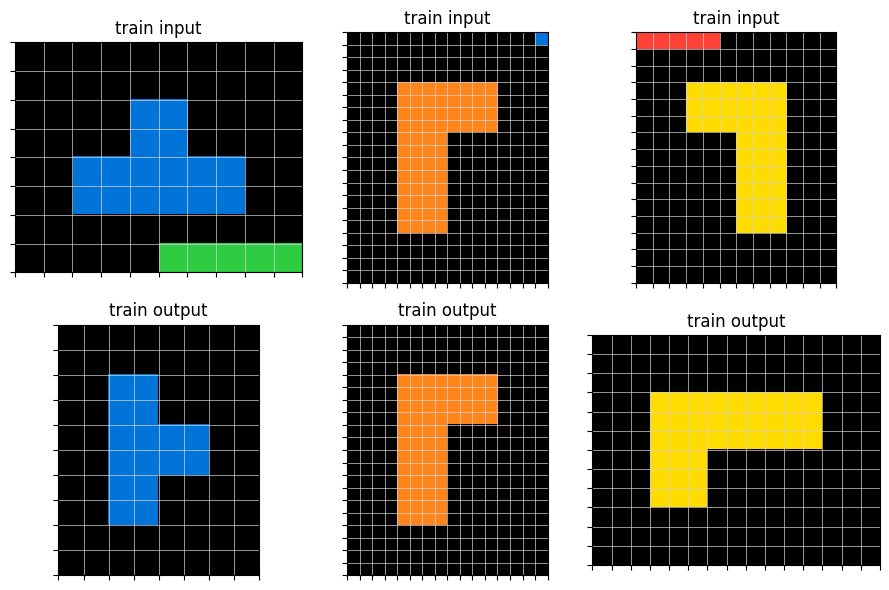

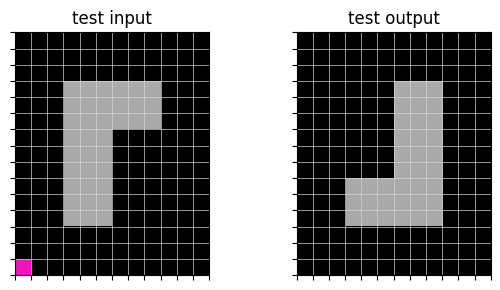

Creating shape_color_scaling riddles with riddle_type=scale_f_line_length_rotate_starting_f_corner_plus_90_deg_per_repeat_color_last_and_first_in_fill_direction_f_line_direction_inter_item_distance_of_0_in_fill_f_1st_line_color_random_line_colors...


100%|██████████| 2/2 [00:04<00:00,  2.24s/it]


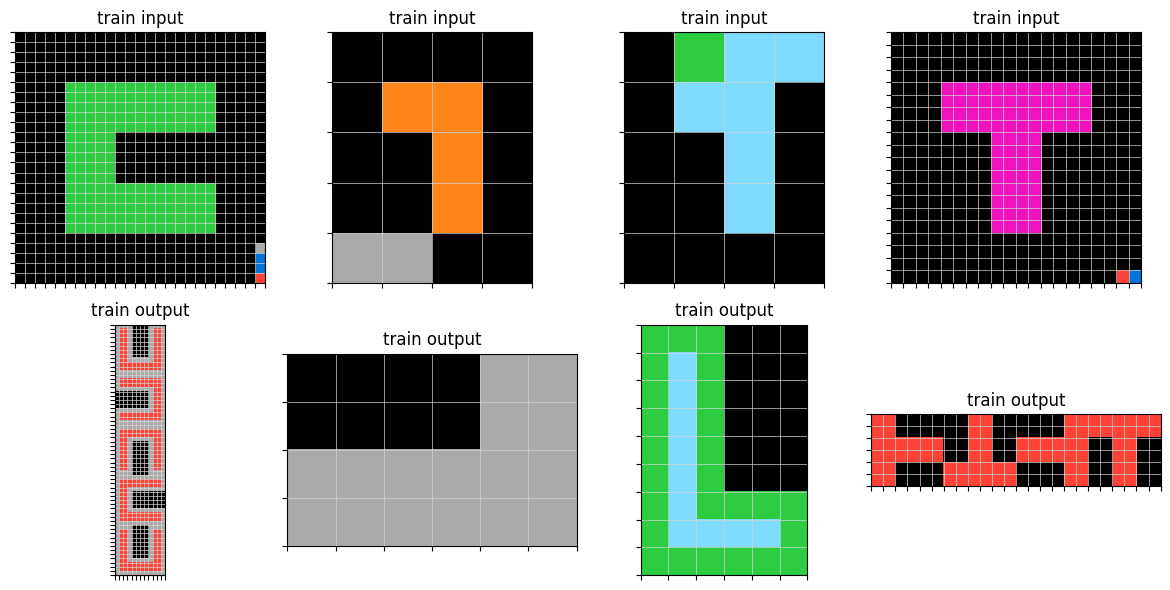

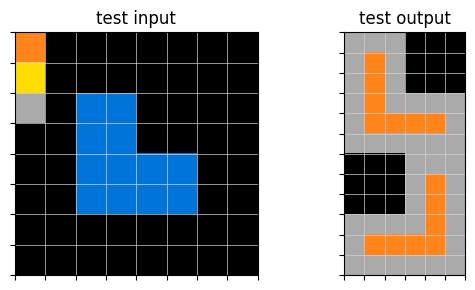

100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

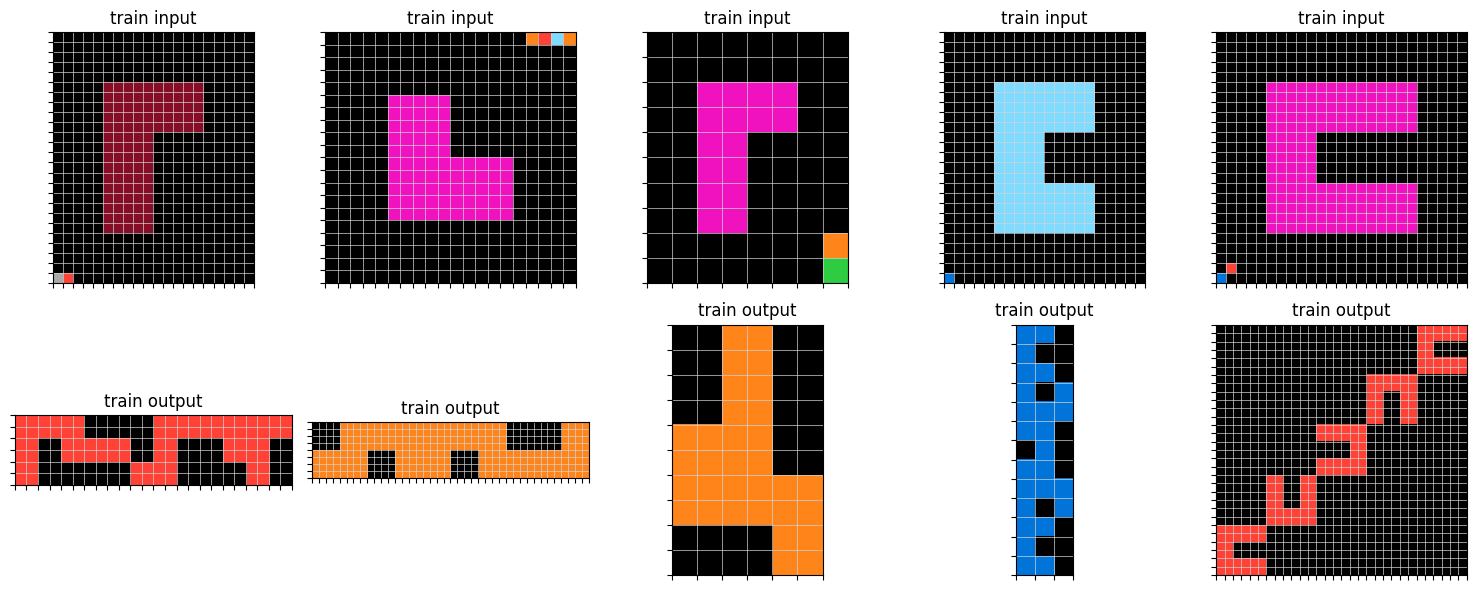

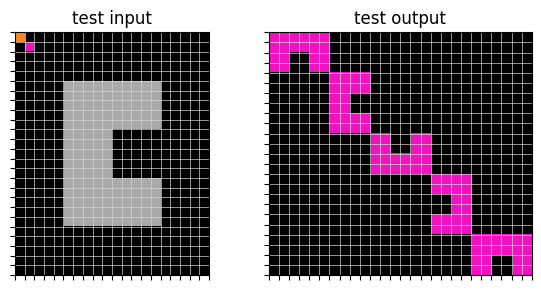

Creating shape_color_scaling riddles with riddle_type=scale_f_line_length_rotate_starting_f_corner_plus_90_deg_per_repeat_color_last_and_first_in_fill_direction_f_line_direction_inter_item_distance_of_0_in_fill_joined_f_1st_line_color_random_line_colors...


100%|██████████| 2/2 [00:03<00:00,  1.98s/it]


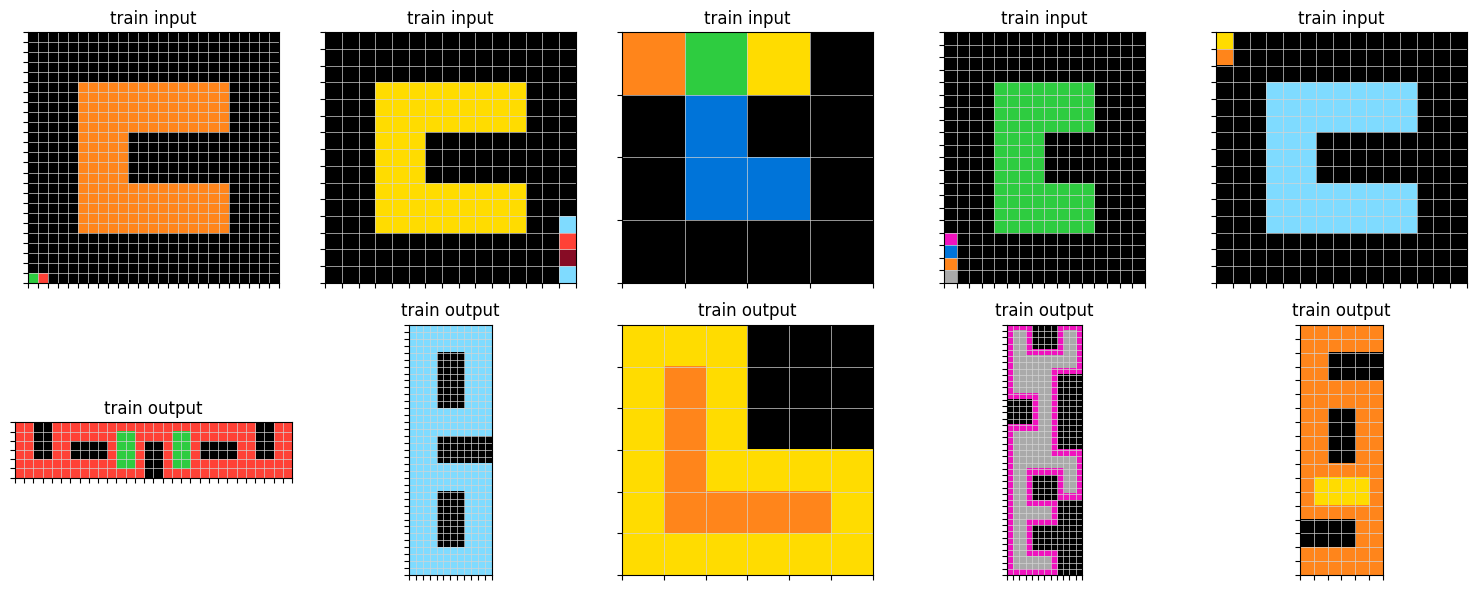

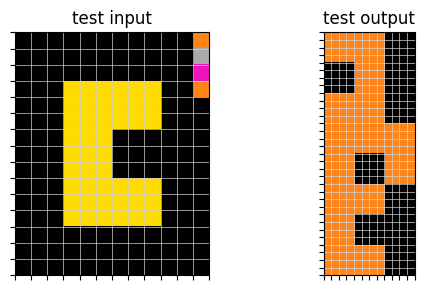

100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

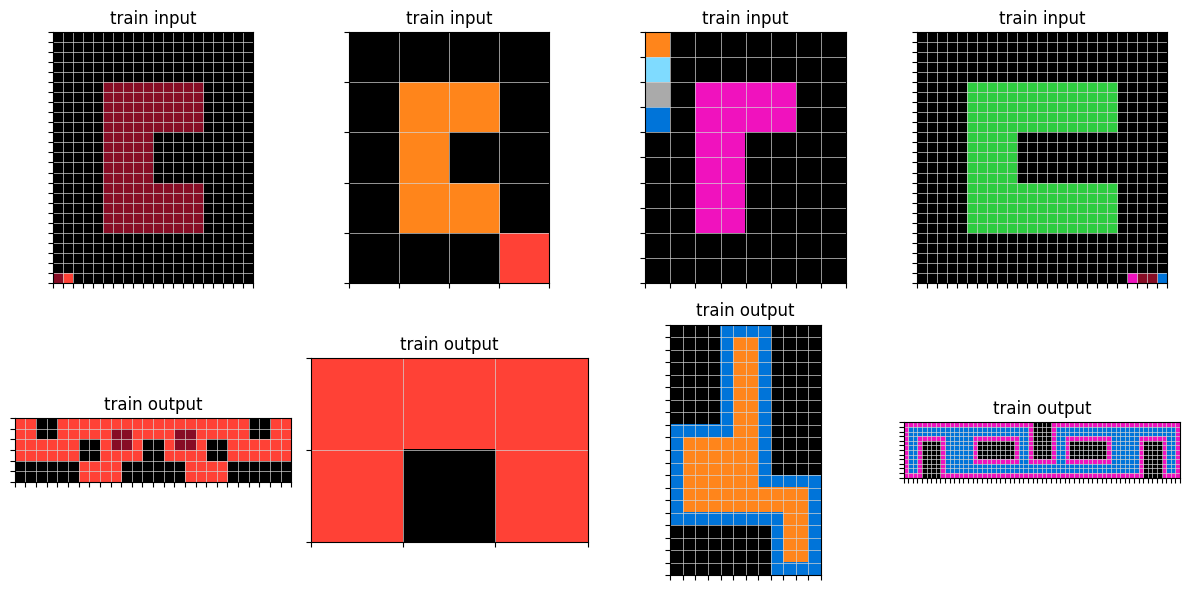

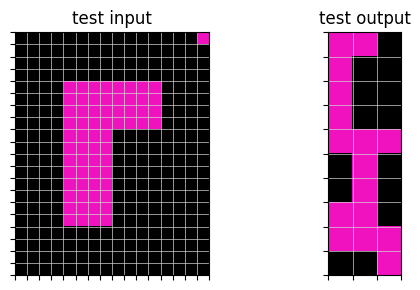

Creating shape_color_scaling riddles with riddle_type=color_scale_rotate_in_fill...


100%|██████████| 2/2 [00:04<00:00,  2.36s/it]


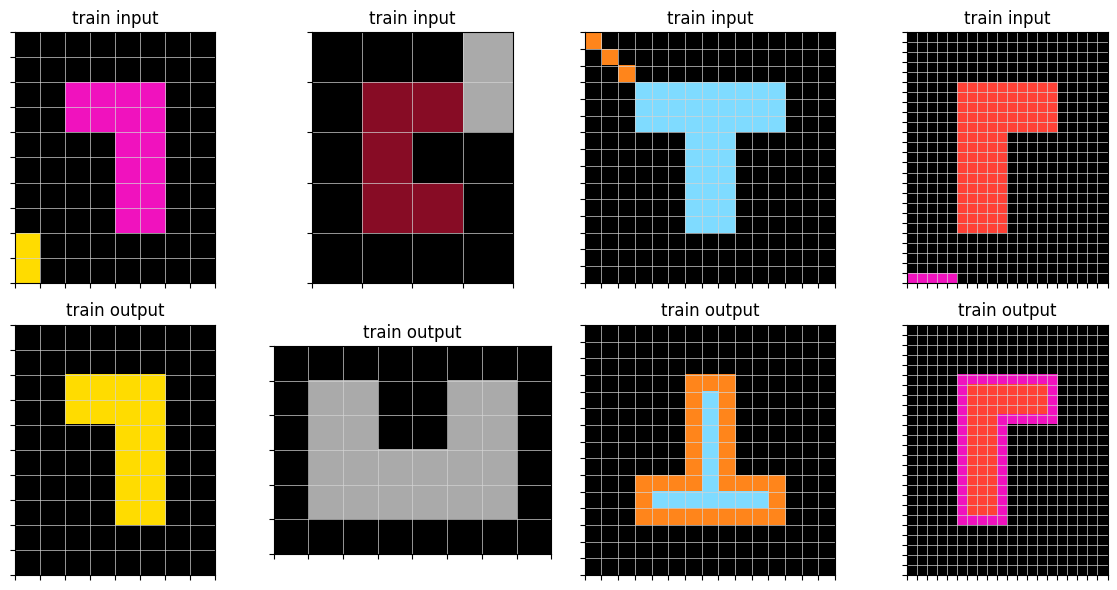

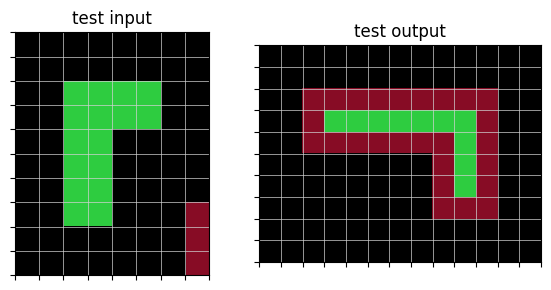

100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

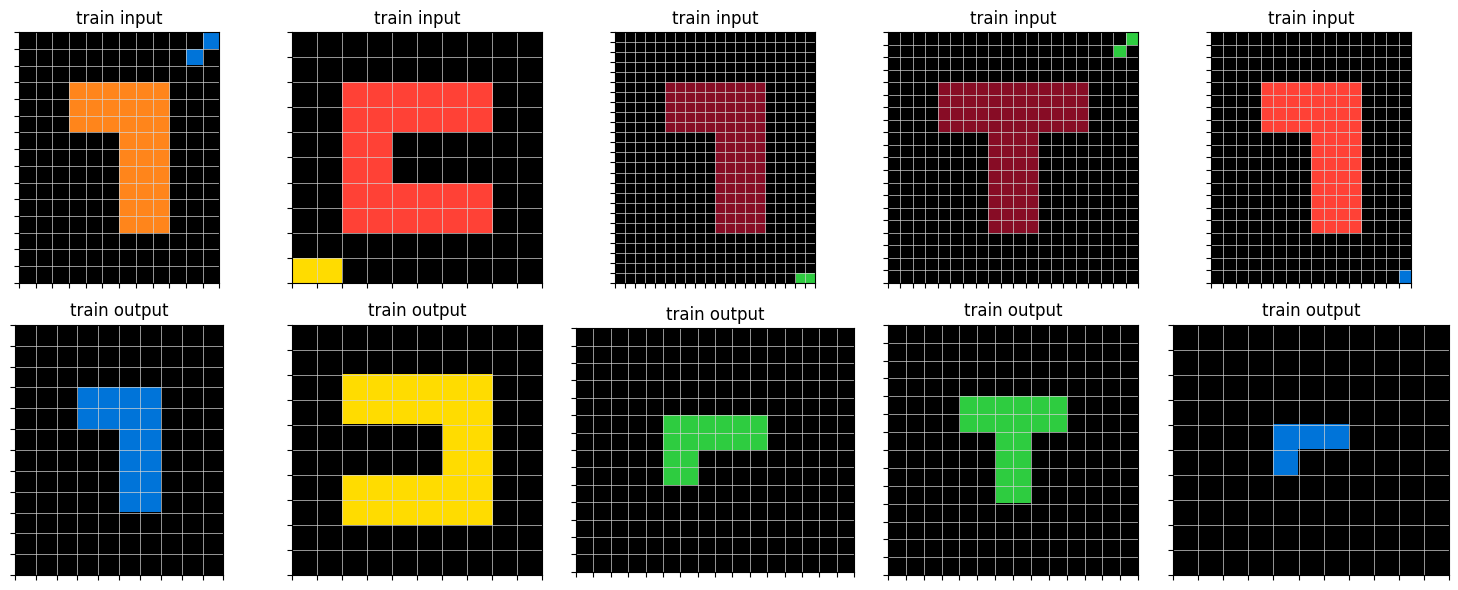

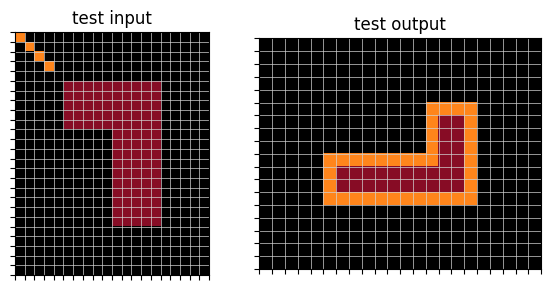

Creating shape_color_scaling riddles with riddle_type=color_scale_rotate_in_fill_pattern1...


100%|██████████| 2/2 [00:05<00:00,  2.74s/it]


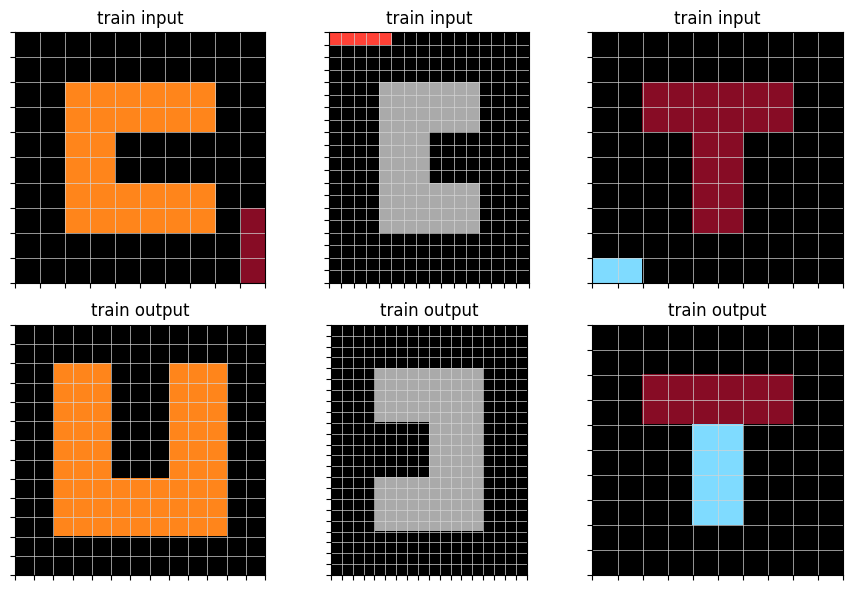

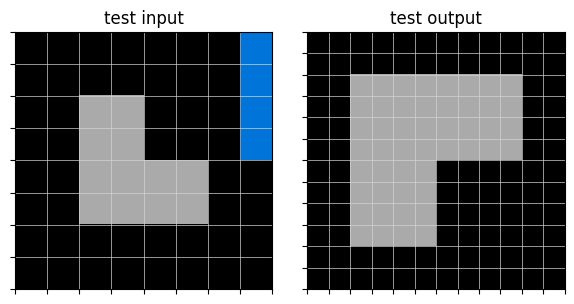

100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

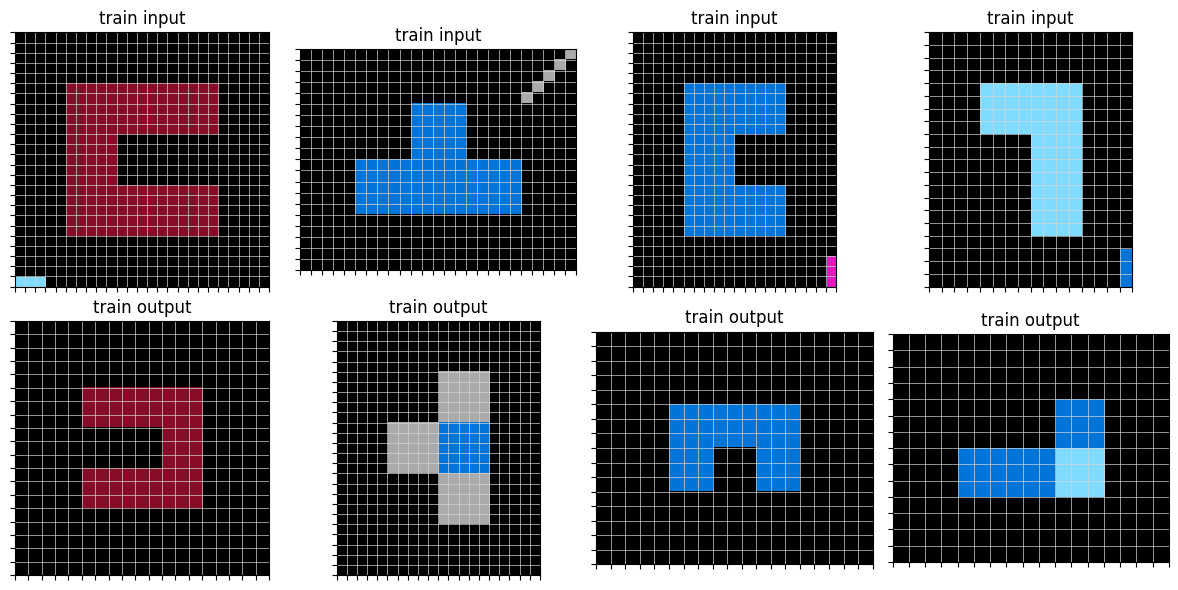

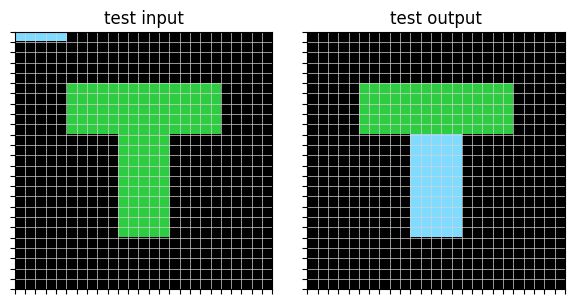

Creating shape_color_scaling riddles with riddle_type=color_scale_rotate_in_fill_pattern2...


100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


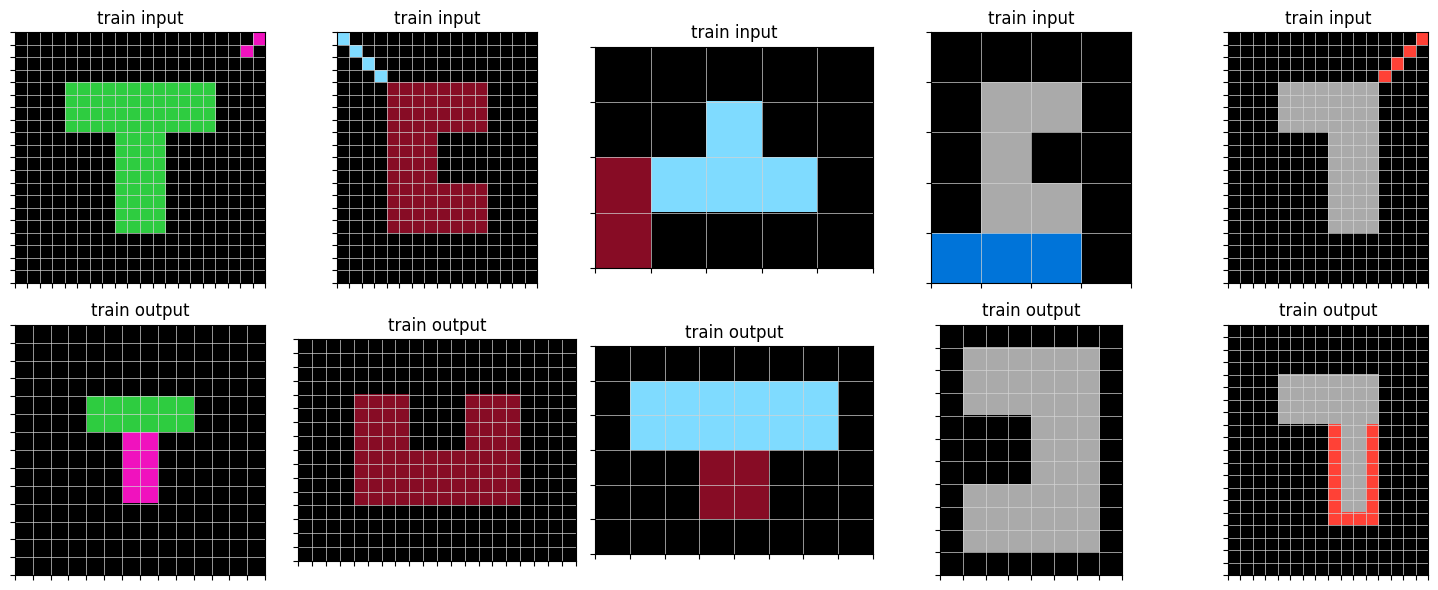

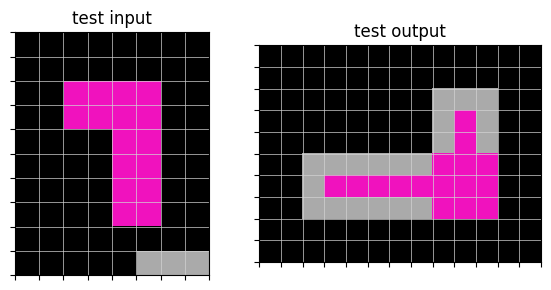

100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

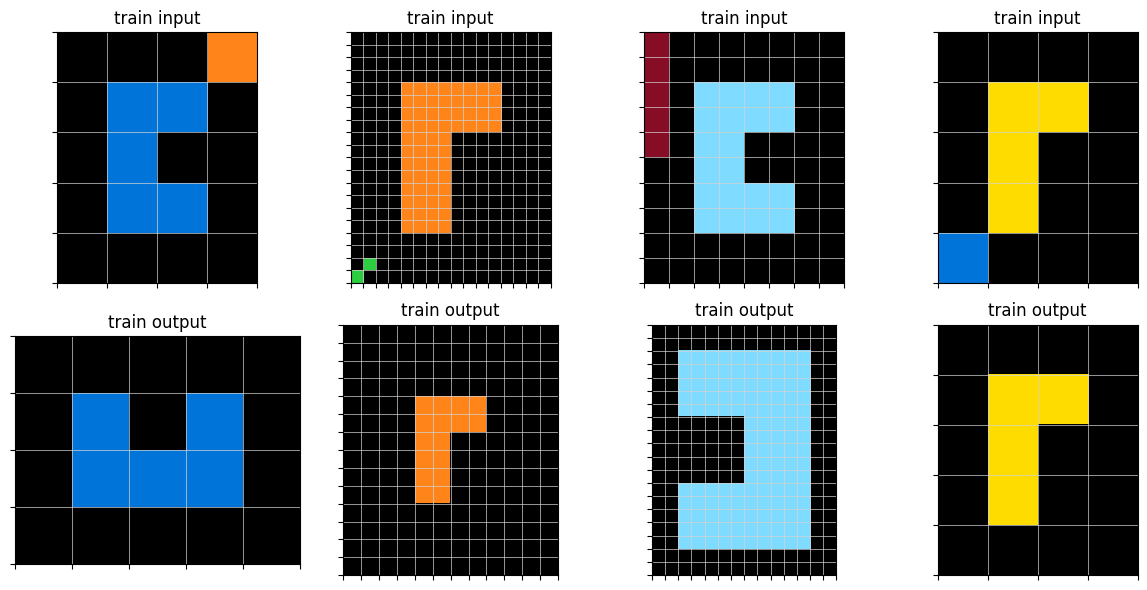

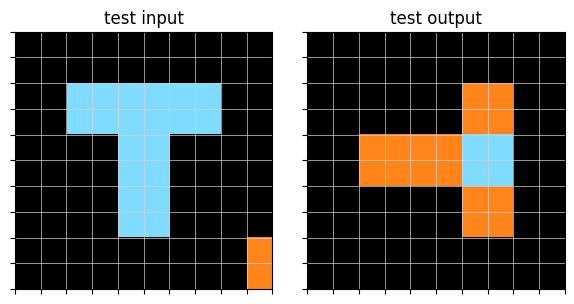

Creating shape_color_scaling riddles with riddle_type=color_scale_rotate_in_fill_checkerboard...


100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


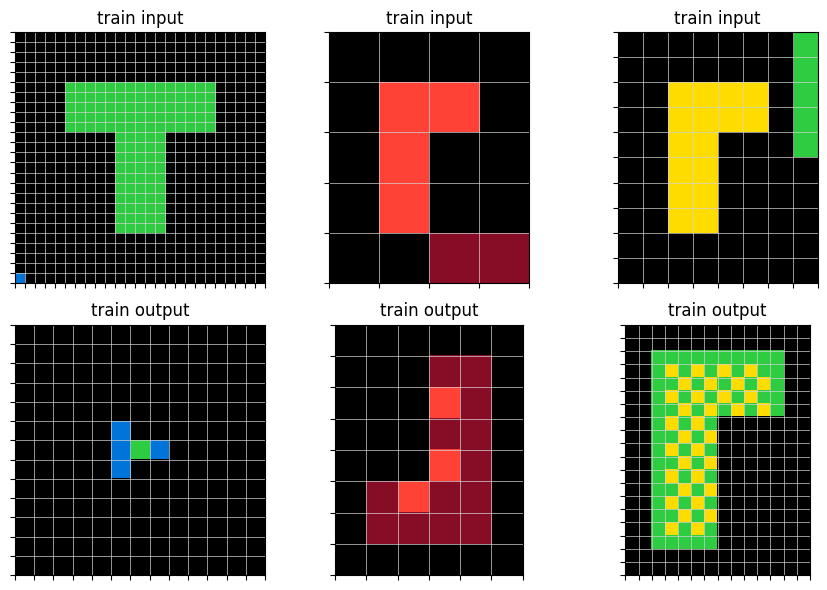

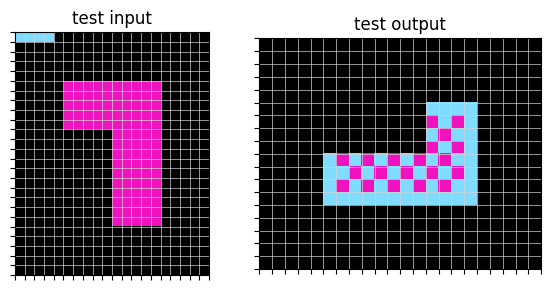

100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

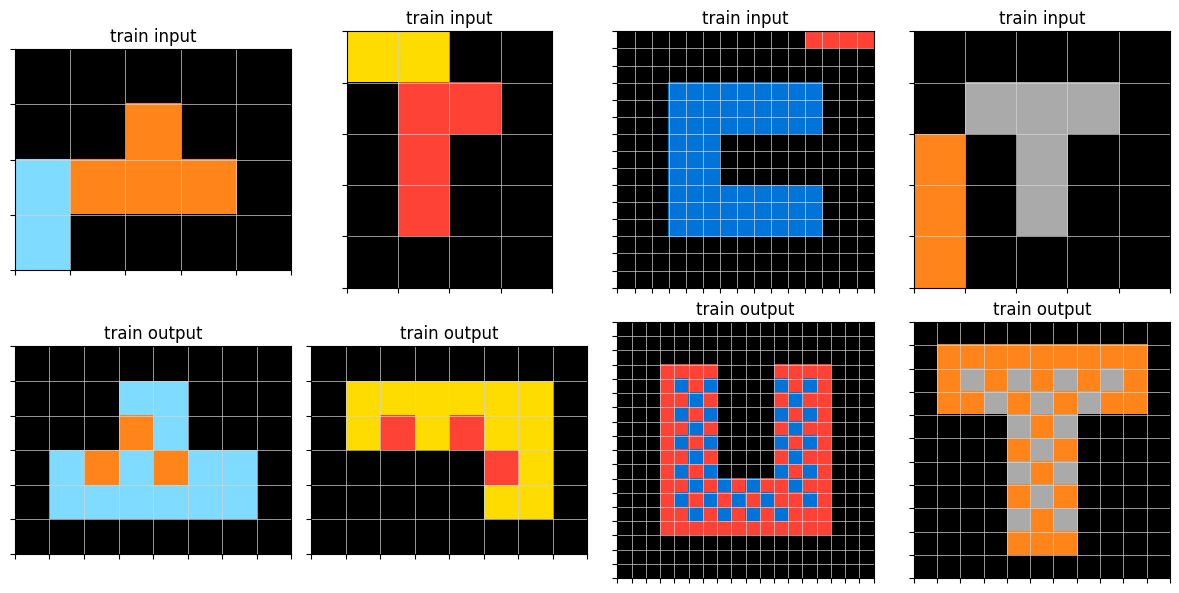

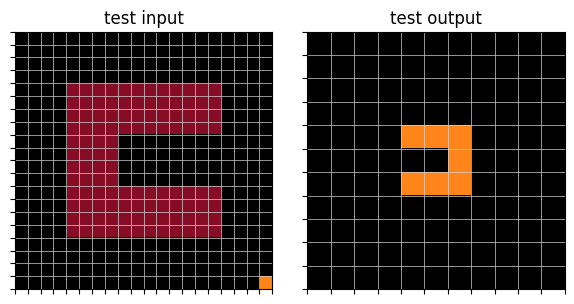

Creating shape_color_scaling riddles with riddle_type=scale_f_line_length_rotate_starting_f_corner_plus_90_deg_per_repeat_color_last_and_first_in_fill_direction_f_line_direction_inter_item_distance_of_0_checkered_in_fill_joined_f_1st_line_color_random_line_colors...


100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


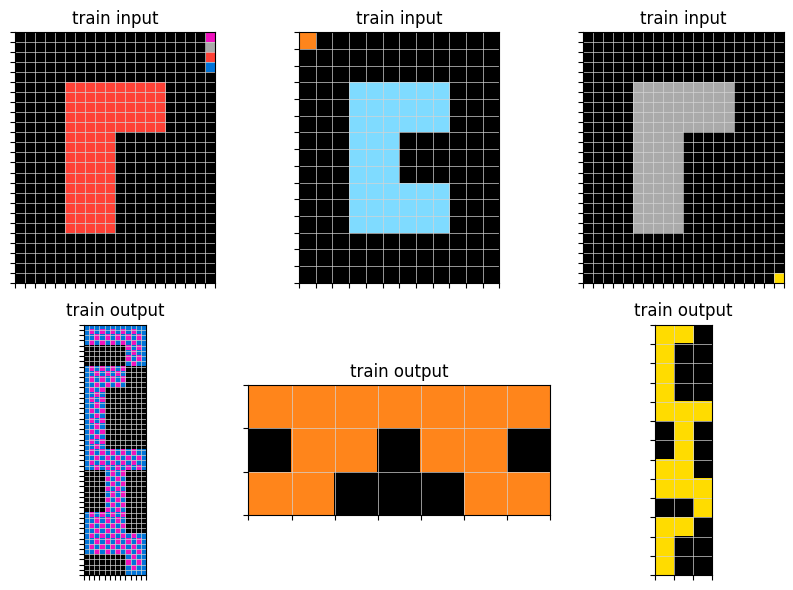

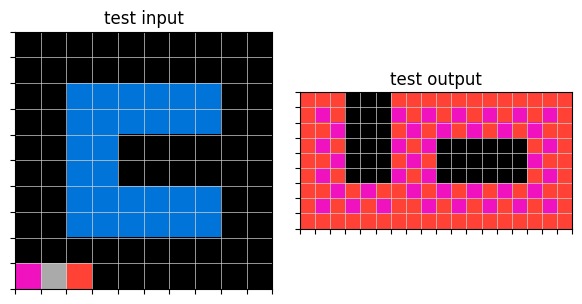

100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

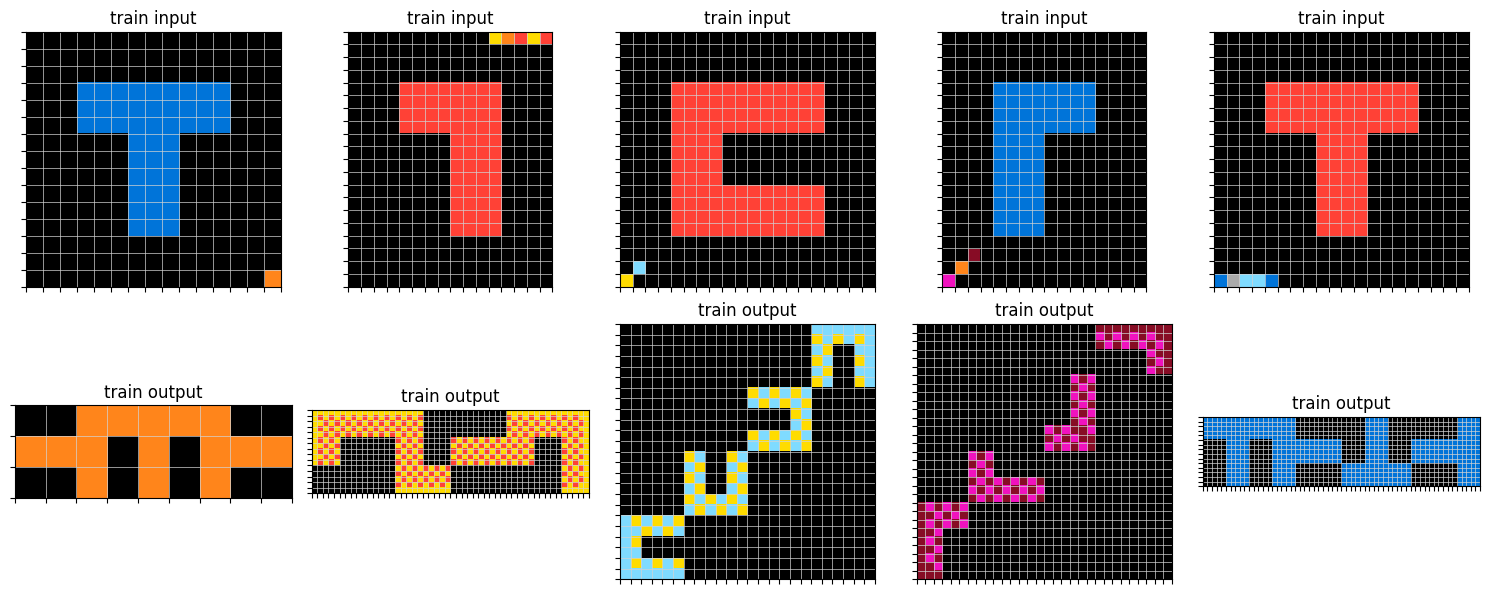

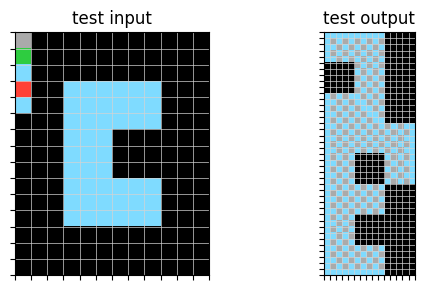

Creating shape_color_scaling riddles with riddle_type=padding_f_scale_shape_repeat_f_line_length_dir_f_line_dir_rotate_starting_with_cardinality_f_corner_plus_90_deg_per_shape_repeat_shape_color_f_line_shape_scale_same_inter_shape_distance_f_scale_random_line_colors_in_fill_f_shape_color...


100%|██████████| 2/2 [00:05<00:00,  2.93s/it]


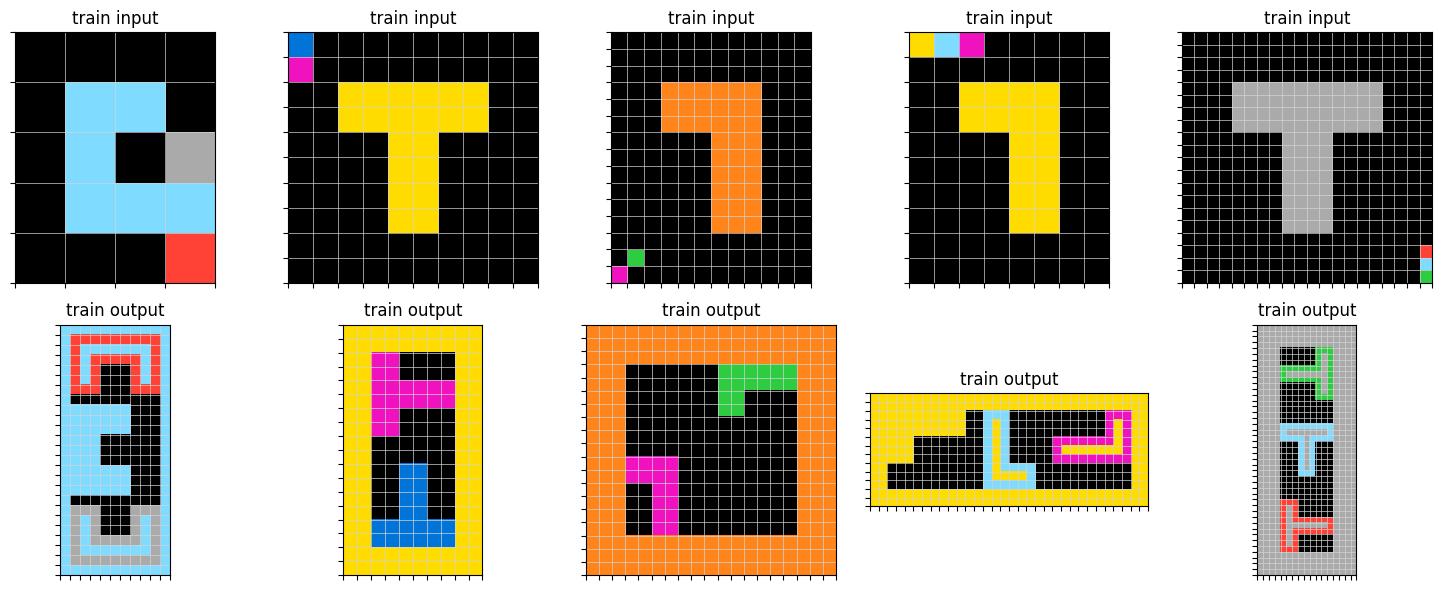

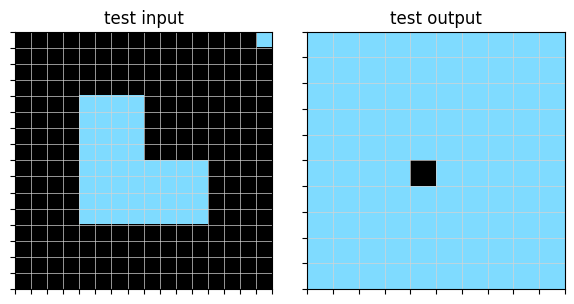

100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

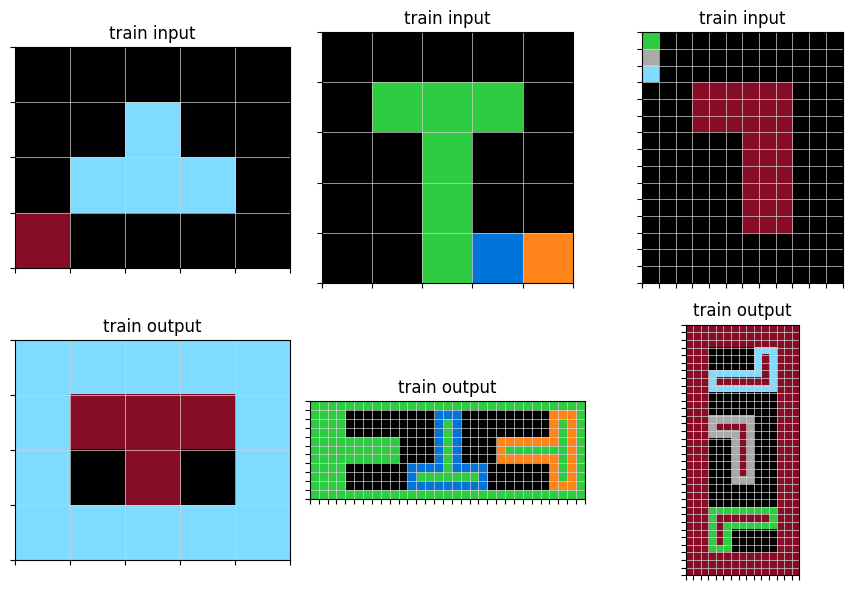

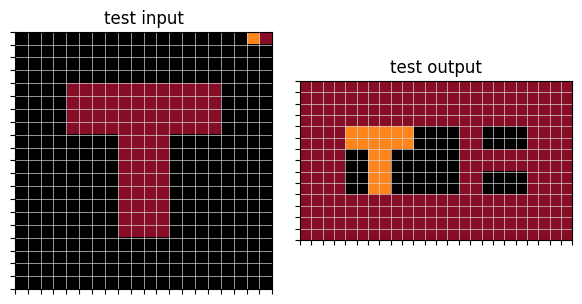

dataset generation complete


In [2]:
# import library for a progress indicator
from tqdm import tqdm
output_folder = dataset_folder

'''andreaskoepf — 10/20/2022
Just some more variantion ideas:
a) random colored bar (non-background colors) - the colors itself have no meaning - but the number of colored pixels defines the target thickness. 
b) dashed bar: with background pixels between the colored pixels
c) distance bar: only start and end-pixel of the bar are visible and their distance defines the target thickness.
d) inverted bar: frame around the image with N background holes that define the thickness/transform/color'''


riddle_creation_functions = [create_shape_scaling_rid]
#riddle_creation_functions = [create_combined_riddle]

riddle_labels = ["shape_color_scaling"]

#riddle_types = ["in_fill", "outline", "border", "corners", "count_shapes_select_nearest_to_scale", "repeat_shape_different_colors_scale_down_to_one", "select_shape_with_the_given_scale", "select_pointed_to_shape", "square_outline"]

#riddle_types = ['color_scale_rotate', 'count_color_and_repeat_shape', 'scale_to_padding_line_length_to_scale_random_indicator_color_corner_to_rotate_padding_color_f_shape_shape_color_f_first_line_pixel', 'color_scale_remove_padding', 'padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_shape_scale_1_shape_color_f_line', 'reverse_count_color_and_repeat_shape_bg_input_shape_color', 'color_scale', 'padding_f_shape_scale_shape_scale_f_indicator_rotate', 'scale_to_padding_line_length_to_scale_random_indicator_color', 'color_rotate', 'color_scale_rotate_remove_padding', 'count_color_and_repeat_shape_bg_input_shape_color', 'scale_to_padding_line_length_to_scale_random_indicator_color_corner_to_rotate', "padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_shape_scale_1_shape_color_f_line", "padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_and_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_shape_scale_1_shape_color_f_line", "padding_f_scale_shape_repeat_f_line_length_direction_f_line_direction_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repeat_shape_color_f_line_shape_scale_1_inter_shape_distance_f_scale_random_line_colors", "no_padding_scale_f_line_length_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_color_f_last_color_in_line_direction_f_line_direction_inter_item_distance_of_0", "scale_rotate", "color", "rotate"]

riddle_types=['color_scale_rotate_remove_padding', 'count_color_and_repeat_shape_bg_input_shape_color', 'scale_to_padding_line_length_to_scale_random_indicator_color_corner_to_rotate', "padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_shape_scale_1_shape_color_f_line", "padding_f_scale_and_shape_repetition_f_line_length_and_direction_f_line_direction_and_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_shape_scale_1_shape_color_f_line", "padding_f_scale_shape_repeat_f_line_length_direction_f_line_direction_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repeat_shape_color_f_line_shape_scale_1_inter_shape_distance_f_scale_random_line_colors", "no_padding_scale_f_line_length_rotate_starting_with_cardinality_f_corner_adding_90_degrees_per_shape_repetition_color_f_last_color_in_line_direction_f_line_direction_inter_item_distance_of_0", "scale_rotate", "color", "rotate"]

in_filling_riddle_types = ["scale_f_line_length_rotate_starting_f_corner_plus_90_deg_per_repeat_color_last_and_first_in_fill_direction_f_line_direction_inter_item_distance_of_0_in_fill_f_1st_line_color_random_line_colors", "scale_f_line_length_rotate_starting_f_corner_plus_90_deg_per_repeat_color_last_and_first_in_fill_direction_f_line_direction_inter_item_distance_of_0_in_fill_joined_f_1st_line_color_random_line_colors", "color_scale_rotate_in_fill","color_scale_rotate_in_fill_pattern1", "color_scale_rotate_in_fill_pattern2", "color_scale_rotate_in_fill_checkerboard", "scale_f_line_length_rotate_starting_f_corner_plus_90_deg_per_repeat_color_last_and_first_in_fill_direction_f_line_direction_inter_item_distance_of_0_checkered_in_fill_joined_f_1st_line_color_random_line_colors", "padding_f_scale_shape_repeat_f_line_length_dir_f_line_dir_rotate_starting_with_cardinality_f_corner_plus_90_deg_per_shape_repeat_shape_color_f_line_shape_scale_same_inter_shape_distance_f_scale_random_line_colors_in_fill_f_shape_color"]

with_bugs = ["color_rotate"]

# add in_filling_riddle_types to riddle_types
riddle_types.extend(in_filling_riddle_types)
#riddle_types = in_filling_riddle_types

# # print the distinct riddles from riddle_types, riddle_types2, riddle_types3
# print("Distinct riddles:")
# print(list(set(riddle_types + riddle_types2 + riddle_types3)))

#riddle_labels = ["combined_pr_cc"]
shape_functions = [draw_left_L_shape, draw_symetric_t_shape, draw_elbow_shape, draw_solid_square_shape, draw_cross_shape, draw_right_L_shape, draw_c_shallow_shape, draw_c_shape, draw_left_s_shape, draw_right_s_shape, draw_t_shape, draw_left_z_shape, draw_right_z_shape]
shape_functions_with_180_degree_rotational_symmetry = [draw_cross_shape, draw_left_s_shape, draw_right_s_shape, draw_left_z_shape, draw_right_z_shape] # for riddles with shape rotation, only allow for cardinality of 1 or when other cardinalities have already been represented
shape_functions_full_rotational_symmetric = [draw_cross_shape, draw_solid_square_shape] # for riddles with shape rotation, only allow when all cardinalities have already been represented

def list_subtract(numerator_list, denominator_list):
    '''Return a list of items in the numerator_list that are not in the denominator_list.'''
    return [item for item in numerator_list if item not in denominator_list]

for riddle_type in riddle_types:
    for i in range(len(riddle_creation_functions)):
        riddle_creation_function= riddle_creation_functions[i]
        plot_count = 0
        print(f"Creating {riddle_labels[i]} riddles with riddle_type={riddle_type}...")
        # init progress bar
        pbar = tqdm(total=dataset_size, position=0)

        for c in range(dataset_size):

            number_test_items = np.random.randint(4,7) if meta_trn_size==0 else meta_trn_size+1

            # we want to sample 3/4 corners for the train items and make sure that all 3 are used at least once. the remaining 1/4 corners are used for the test item.
            all_corners = [0, 1, 2, 3]
            available_corners_for_train = np.random.choice(all_corners, 3, replace=False)
            if number_test_items > 4:
                # shuffle available corners for train to train_corners
                train_corners = np.random.choice(available_corners_for_train, 3, replace=False)
                # append the additional corners to train_corners to get the full number by using np.random.choose
                train_corners = np.append(train_corners, np.random.choice(available_corners_for_train, number_test_items-4, replace=True))
            else:
                train_corners = np.random.choice(available_corners_for_train, number_test_items-1, replace=False)
            
            # test corner is the left out corner (set of all corners - set of train corners)
            test_corner = list(set(all_corners) - set(train_corners))[0]
            
            # create a corner to cardinality4 mapping for all_corners that is 
            # the mapping should vary from riddle to riddle
            cardinality4_mapping = np.random.choice([0, 1, 2, 3], 4, replace=False)
            if debug_mode:
                print(f"available_corners_for_train: {available_corners_for_train}, train_corners: {train_corners}, test_corner: {test_corner}, cardinality4_mapping: {cardinality4_mapping}")

            # parameters for create_shape_scaling_riddle
            #def create_shape_scaling_riddle(num_test_items, shape_functions, rows=0, cols=0, require_generalization_for_rotation=False, require_generalization_for_color=False, scale_indicator_mode="count", indicator_count=1, indicator_color_mode="color", color_shape1=0, shape_scale1=0):

            # determine the shape functions based on whether rotation is required
            if "rotate" in riddle_type:
                current_shape_functions = list_subtract(list_subtract(shape_functions,  shape_functions_with_180_degree_rotational_symmetry),shape_functions_full_rotational_symmetric)
            else:
                current_shape_functions = shape_functions
            if "repeat" in riddle_type or "repetition" in riddle_type:
                input_grids, output_grids, params = create_shape_repetition_riddle(riddle_type, number_test_items, current_shape_functions, train_corners, test_corner, cardinality4_mapping, True if "reverse" in riddle_type else False, rows=0, cols=0, indicator_count=1, indicator_color_mode="color", color_shape1=0, shape_scale1=0, debug_mode=False)
            else:
                input_grids, output_grids, params = riddle_creation_function(riddle_type, number_test_items, current_shape_functions, train_corners, test_corner, cardinality4_mapping, True if "reverse" in riddle_type else False, rows=0, cols=0, indicator_count=1, indicator_color_mode="color", color_shape1=0, shape_scale1=0, debug_mode=False)
            pbar.update(1)
            # set the train and test data; train is all but the last item, test is the last item
            train_input_grids = input_grids[:-1]
            train_output_grids = output_grids[:-1]
            test_input_grids = input_grids[-1:]
            test_output_grids = output_grids[-1:]

            json_obj = {}
            json_obj['train'] = []
            json_obj['test'] = []
            # train
            for io_pair in range(len(train_input_grids)):
                # print the type of train_input_grids[io_pair]
                #print(type(train_input_grids[io_pair]))
                #print("input grid:\n")
                #print(train_input_grids[io_pair])

                a = {
                    'input': train_input_grids[io_pair].tolist(),
                    'output': train_output_grids[io_pair].tolist()
                }
                json_obj['train'].append(a)

            a = {'input': test_input_grids[0].tolist(),
                    'output': test_output_grids[0].tolist()    }
            json_obj['test'].append(a)
            if subdirs_for_each_type: # check to make sure that dataset_folder / riddle_type exists
                # check for max file name length
                assert len(riddle_type) <= 255, "riddle_type is too long for a folder name"
                output_folder = os.path.join(dataset_folder, riddle_type)
            #print(f"output_folder: {output_folder}")                
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)
            if not subdirs_for_each_type:
                output_folder = os.path.join(dataset_folder, riddle_labels[i])
            # verify folder exists ./dungeon_dataset/
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)
            #make a new filename that is 8 characters long and represents a random hex number
            # characters betwee 0-9 and a-f
            string = '0123456789abcdef'
            filename = ''.join(random.choice(string) for t in range(8)) + f"_{riddle_type}.json"
            # check for max file name length
            assert len(filename) <= 260, "filename is too long"
            # write the json object to a file
            with open(os.path.join(output_folder, filename), 'w') as outfile:
                json.dump(json_obj, outfile)
            if plot_count < plot_items:
                # plot the riddle
                if debug_mode:
                    print(params)
                plot_task(train_input_grids, train_output_grids, test_input_grids, test_output_grids, True)
                plot_count += 1

print("dataset generation complete")

# todo: add shapes and random shapes of YxX size

# Below is for testing

In [ ]:
# testing
#working_board = create_blank_board(10, 10, 0)
#{'input': [{'shape': 'draw_right_L_shape', 'scale': 5, 'color': 8, 'padding': 5, 'corner': 3, 'line_length': 1, 'line_color': 5, 'cardinality8': 0}, {'shape': 'draw_left_L_shape', 'scale': 4, 'color': 6, 'padding': 4, 'corner': 3, 'line_length': 2, 'line_color': 9, 'cardinality8': 1}
#draw_line_f_point(board, bring_to_front: bool, fg: int, startx: int, starty: int, cardinality8: int, length: int, bg=0) -> Board:
#working_board = draw_line_f_point(working_board, True, 1, 0, 0, 3, 2)
#working_board = draw_line_xy_to_xy(working_board, True, 1, 0, 0, 0, 9, 0)
#working_board = draw_left_L(working_board, 1, 0, 0, 3, 0, 0)

#draw_rectange_shape
#working_board = draw_shape(working_board, draw_solid_square_shape, True, 3, 0, 0, 1, 0, 0)
#visualize_board(working_board)
#draw_shape(board, shape_fn, bring_to_front: bool, fg: int, startx: int, starty: int, scale=1, cardinality=0, bg=-1) -> Board:
#working_board = draw_shape(working_board, draw_symetric_t_shape,True, 3, 5, get_lowest_content_index(working_board)+1, 3, 0, 0)
#working_board = draw_shape(working_board, draw_elbow_shape, False, 2, 0, get_lowest_content_index(working_board)+2, 4, 0, 0)
# draw square
#working_board = draw_shape(working_board, draw_solid_square_shape, False, 2, 0, get_lowest_content_index(working_board)+2, 4, 0, 0)

# print the lowest and rightmost content index
#print(f"lowest content index: {get_lowest_content_index(working_board)}, rightmost content index: {get_rightmost_content_index(working_board)}")

#working_board = draw_shape(working_board, draw_solid_square_shape, True,5, 5, 0, 4, 0, 0)
#working_board = draw_shape(working_board, draw_cross_shape, False, 6, 10, 10, 4, 0, 0)
#draw_line_xy_to_xy(board: Board, bring_to_front, fg, startx, starty, endx, endy, bg=-1) -> Board:
#insert_row(board, row_count=1, row_index=0, bg_color=0):


# working_board = insert_row(working_board, 2)
# working_board = draw_line_xy_to_xy(working_board, True, 2, 0, 0, 9, 0, 0)
# #working_board = draw_line_xy_to_xy(working_board, False, 2, 0, 0, 0, 9, 0)
# working_board = add_row(working_board, 1, 0)
# working_board = add_column(working_board, 2, 0)
# # insert column
# working_board = insert_column(working_board, 3)
# # delete column 3
# working_board = remove_column(working_board, 2, 3)

#working_board = scale_board(working_board, 2, True, 0)
#working_board = remove_padding(working_board, 0)

#working_board = resize_board(working_board, 15, 15, True, True, 0)
# add one pixel of color 1 at 0,0
#working_board = draw_line_xy_to_xy(working_board, True, 1, 0, 0, 2, 0, 0)


# draw a shape and test in_filling of the color
#def draw_shape(board, shape_fn, bring_to_front: bool, fg: int, startx: int, starty: int, scale=1, cardinality=0, bg=-1, in_fill=-1):
working_board = create_blank_board(1, 1, 0)
# iterate through all shapes and iterate from 1 to 6 for scale

for shape in shape_functions:
    for scale in range(1, 6):
        # choose a fg color (1-9)
        fg = random.randint(1, 9)
        # choose a in_fill color (1-9) that is different from fg
        in_fill = random.randint(1, 9)
        working_board = draw_shape(working_board, shape, True, fg, 0, 0, scale, 0, 0, in_fill, in_fill_shape_checkerboard)
        plot_board(working_board, True)
        working_board = create_blank_board(1, 1, 0)


In [ ]:
"""
1. a board is a 2D numpy array
2. it has a shape of color fg (an integer number) and background color of 0
3. write an in-filling function (fill the interior with color in_fill_color). it should accept the parameters of board, shape_color, in_fill_color. do not change the colors of the shape border/edges.
4. example below

array = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

in_fill(array, 1, 2)

result:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
            [0, 0, 1, 2, 2, 2, 1, 0, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

"""

#def draw_shape(board, shape_fn, bring_to_front: bool, fg: int, startx: int, starty: int, scale=1, cardinality=0, bg=-1, in_fill=-1):
#shape_functions = [draw_left_L_shape, draw_symetric_t_shape, draw_elbow_shape, draw_solid_square_shape, draw_cross_shape, draw_right_L_shape, draw_c_shallow_shape, draw_c_shape, draw_left_s_shape, draw_right_s_shape, draw_t_shape, draw_left_z_shape, draw_right_z_shape, draw_t_shape]
#shape_functions_with_180_degree_rotational_symmetry = [draw_cross_shape, draw_left_s_shape, draw_right_s_shape, draw_left_z_shape, draw_right_z_shape] # for riddles with shape rotation, only allow for cardinality of 1 or when other cardinalities have already been represented

#iterate through scales 1 to 8
for scale in range(3, 6):
    # iterate through all shapes
    for shape_fn in shape_functions:
        array = create_blank_board(1, 1, 0)
        array = draw_shape(array, shape_fn, True, 1, 0, 0, scale, 0, 0, 2, shape_color_and_in_fill)
        #array = fill_pattern2(array, 1, 2)
        #array = shape_color_and_in_fill(array, 1, 2)
        array = shape_color_and_in_fill(array, 2, 3)

        
        # replace 2's with 1
        #array[array == 2] = 1
        #plot_board(in_fill(array, 1, 2), True)
        plot_board(array, True)
        #print(array)

In [ ]:
shape_fn = draw_t_shape
scale = 5

array = create_blank_board(1, 1, 0)
array = draw_shape(array, shape_fn, True, 1, 0, 0, scale, 0, 0)
# draw another shape to the right
array = draw_shape(array, shape_fn, True, 1, get_rightmost_content_index(array)+1, 0, scale, 0, 0)


# make the above into a function called shape_in_fill


array = shape_color_and_in_fill(array, 1, 2)
plot_board(array, True)
array = shape_color_and_in_fill(array, 2, 3)

print(array)
# replace 2's with 1
#array[array == 2] = 1
#plot_board(in_fill(array, 1, 2), True)
plot_board(array, True)